# PRUEBA DE CONOCIMIENTO - USO Y ANALISIS DE DATOS CON PYTHON
## Parte 2: Analisis Exploratorio
Dataset: Empaquetamiento de servicios fijos (Postdata)

## Configuracion inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Configuracion
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}' if abs(x) < 1e6 else f'{x:,.0f}')

## Carga del dataset limpio

In [2]:
print("="*80)
print("CARGANDO DATASET LIMPIO")
print("="*80)

df = pd.read_csv('empaquetamiento_fijo_limpio_2023_2024.csv')

print(f"Dataset cargado exitosamente")
print(f"  - Registros totales: {len(df):,}")
print(f"  - Columnas: {len(df.columns)}")
print(f"  - Rango de anos: {df['ANNO'].min()} - {df['ANNO'].max()}")
print(f"  - Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

CARGANDO DATASET LIMPIO
Dataset cargado exitosamente
  - Registros totales: 1,750,659
  - Columnas: 22
  - Rango de anos: 2023 - 2024
  - Memoria utilizada: 1045.53 MB


## 1. DESCRIPCION GENERAL DE LA BASE

### 1.1 Numero total de registros por ano


1. DESCRIPCION GENERAL DE LA BASE

1.1 Numero total de registros por ano:
--------------------------------------------------------------------------------

Total de registros:
  2023:    898,318 (51.31%)
  2024:    852,341 (48.69%)

Variacion 2023-2024:
  Diferencia absoluta: -45,977 registros
  Diferencia porcentual: -5.12%


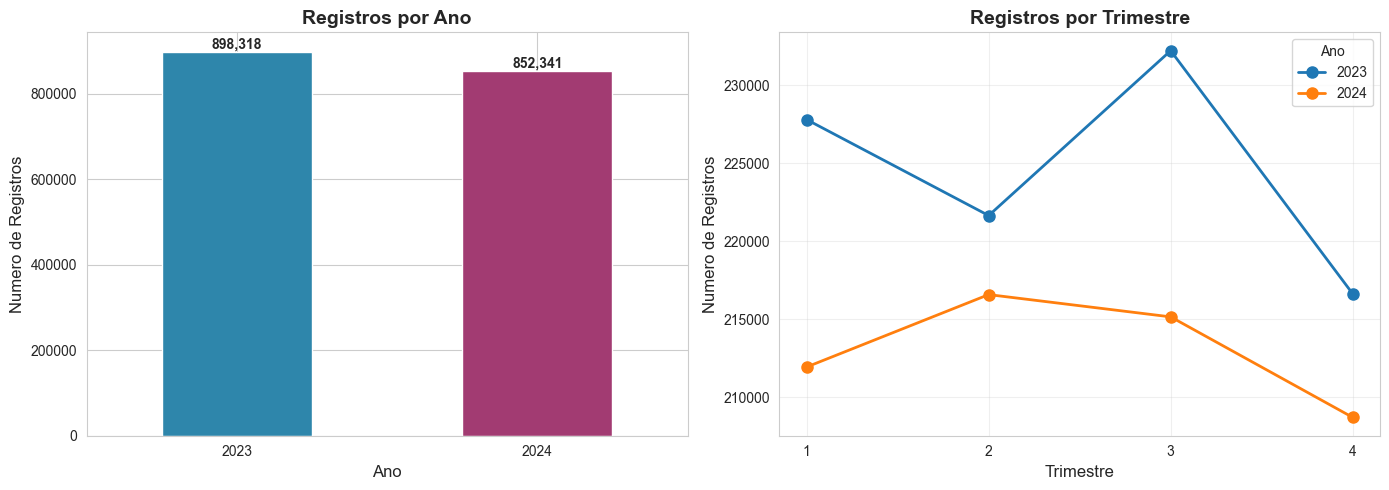

In [3]:
print("\n" + "="*80)
print("1. DESCRIPCION GENERAL DE LA BASE")
print("="*80)

print("\n1.1 Numero total de registros por ano:")
print("-" * 80)

registros_por_ano = df.groupby('ANNO').size()
print(f"\nTotal de registros:")
for ano, count in registros_por_ano.items():
    pct = count / len(df) * 100
    print(f"  {ano}: {count:>10,} ({pct:>5.2f}%)")

# Diferencia absoluta y porcentual
diff = registros_por_ano[2024] - registros_por_ano[2023]
diff_pct = (diff / registros_por_ano[2023]) * 100
print(f"\nVariacion 2023-2024:")
print(f"  Diferencia absoluta: {diff:+,} registros")
print(f"  Diferencia porcentual: {diff_pct:+.2f}%")

# Visualizacion
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Grafico de barras
registros_por_ano.plot(kind='bar', ax=ax1, color=['#2E86AB', '#A23B72'])
ax1.set_title('Registros por Ano', fontsize=14, fontweight='bold')
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_ylabel('Numero de Registros', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
for i, v in enumerate(registros_por_ano):
    ax1.text(i, v + 1000, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Grafico por trimestre
trim_ano = df.groupby(['ANNO', 'TRIMESTRE']).size().reset_index(name='count')
for ano in [2023, 2024]:
    data_ano = trim_ano[trim_ano['ANNO'] == ano]
    ax2.plot(data_ano['TRIMESTRE'], data_ano['count'], marker='o', linewidth=2, 
             label=str(ano), markersize=8)
ax2.set_title('Registros por Trimestre', fontsize=14, fontweight='bold')
ax2.set_xlabel('Trimestre', fontsize=12)
ax2.set_ylabel('Numero de Registros', fontsize=12)
ax2.set_xticks([1, 2, 3, 4])
ax2.legend(title='Ano', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 1.2 Conteo de operadores reportados


1.2 Conteo de operadores reportados:
--------------------------------------------------------------------------------

Operadores unicos por ano:
  2023: 1290 operadores
  2024: 1423 operadores

Operadores comunes en ambos anos: 1160
Operadores solo en 2023: 130
Operadores solo en 2024: 263

Top 10 operadores por numero de registros:
   1. COMUNICACION CELULAR S A COMCEL S A               :  571,240 (32.63%)
   2. COLOMBIA TELECOMUNICACIONES S.A. E.S.P.           :  262,498 (14.99%)
   3. UNE EPM TELECOMUNICACIONES S.A.                   :  214,665 (12.26%)
   4. EDATEL S.A.                                       :   72,143 ( 4.12%)
   5. DIRECTV COLOMBIA LTDA                             :   63,232 ( 3.61%)
   6. AZTECA COMUNICACIONES COLOMBIA S.A.S              :   62,681 ( 3.58%)
   7. LEGON TELECOMUNICACIONES S.A.S.                   :   37,578 ( 2.15%)
   8. HUGHES DE COLOMBIA S.A.S.                         :   27,262 ( 1.56%)
   9. EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP 

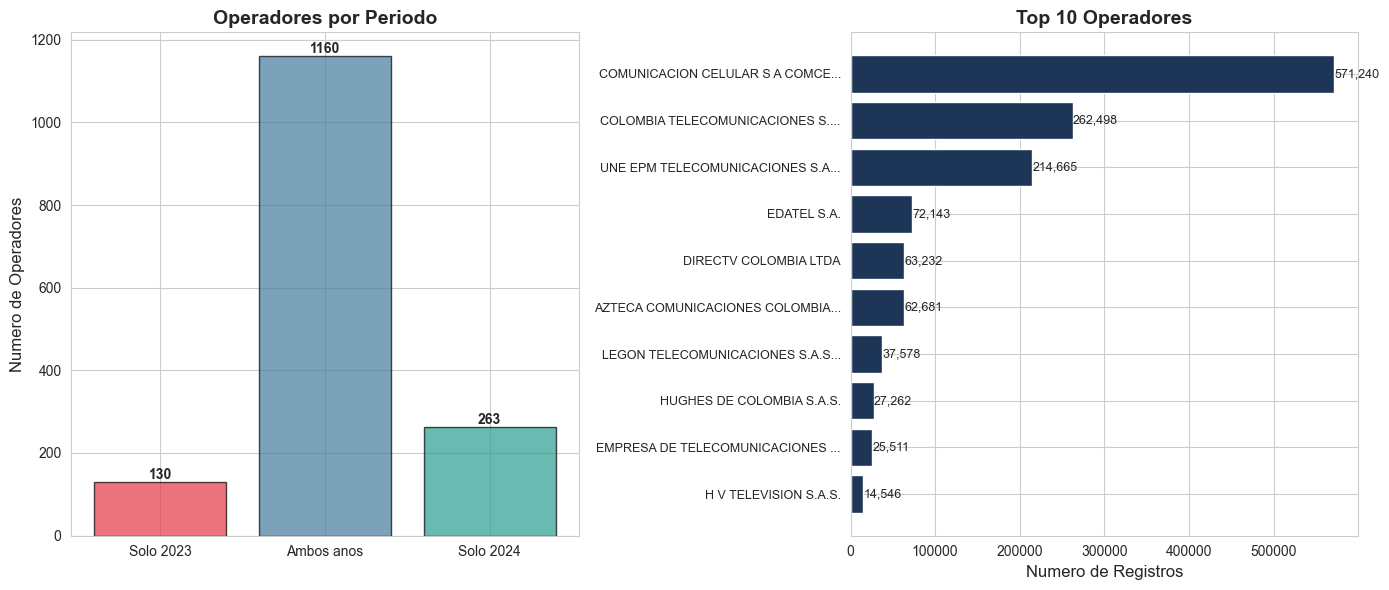

In [4]:
print("\n1.2 Conteo de operadores reportados:")
print("-" * 80)

operadores_por_ano = df.groupby('ANNO')['EMPRESA'].nunique()
print(f"\nOperadores unicos por ano:")
for ano, count in operadores_por_ano.items():
    print(f"  {ano}: {count} operadores")

# Operadores que reportaron en ambos anos
ops_2023 = set(df[df['ANNO'] == 2023]['EMPRESA'].unique())
ops_2024 = set(df[df['ANNO'] == 2024]['EMPRESA'].unique())
ops_comunes = ops_2023.intersection(ops_2024)
ops_solo_2023 = ops_2023 - ops_2024
ops_solo_2024 = ops_2024 - ops_2023

print(f"\nOperadores comunes en ambos anos: {len(ops_comunes)}")
print(f"Operadores solo en 2023: {len(ops_solo_2023)}")
print(f"Operadores solo en 2024: {len(ops_solo_2024)}")

# Top 10 operadores por numero de registros
print(f"\nTop 10 operadores por numero de registros:")
top_operadores = df['EMPRESA'].value_counts().head(10)
for i, (empresa, count) in enumerate(top_operadores.items(), 1):
    pct = count / len(df) * 100
    print(f"  {i:2d}. {empresa[:50]:50s}: {count:>8,} ({pct:>5.2f}%)")

# Visualizacion
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Diagrama de Venn conceptual
venn_data = pd.DataFrame({
    'Categoria': ['Solo 2023', 'Ambos anos', 'Solo 2024'],
    'Cantidad': [len(ops_solo_2023), len(ops_comunes), len(ops_solo_2024)]
})
colors = ['#E63946', '#457B9D', '#2A9D8F']
ax1.bar(venn_data['Categoria'], venn_data['Cantidad'], color=colors, alpha=0.7, edgecolor='black')
ax1.set_title('Operadores por Periodo', fontsize=14, fontweight='bold')
ax1.set_ylabel('Numero de Operadores', fontsize=12)
for i, v in enumerate(venn_data['Cantidad']):
    ax1.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# Top 10 operadores
top_10 = df['EMPRESA'].value_counts().head(10)
ax2.barh(range(len(top_10)), top_10.values, color='#1D3557')
ax2.set_yticks(range(len(top_10)))
ax2.set_yticklabels([emp[:30] + '...' if len(emp) > 30 else emp for emp in top_10.index], fontsize=9)
ax2.set_xlabel('Numero de Registros', fontsize=12)
ax2.set_title('Top 10 Operadores', fontsize=14, fontweight='bold')
ax2.invert_yaxis()
for i, v in enumerate(top_10.values):
    ax2.text(v + 500, i, f'{v:,}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

### 1.3 Distribucion por departamentos y municipios


1.3 Distribucion por departamentos y municipios:
--------------------------------------------------------------------------------

Total departamentos: 33
Total municipios: 1037

Top 10 departamentos por numero de registros:
   1. ANTIOQUIA                :  268,970 (15.36%) | 125 mun. | 273 emp.
   2. CUNDINAMARCA             :  234,624 (13.40%) | 116 mun. | 237 emp.
   3. VALLE DEL CAUCA          :  172,413 ( 9.85%) |  42 mun. | 241 emp.
   4. SANTANDER                :  108,131 ( 6.18%) |  87 mun. | 165 emp.
   5. BOYACÁ                   :   87,465 ( 5.00%) | 123 mun. | 135 emp.
   6. CALDAS                   :   69,606 ( 3.98%) |  27 mun. | 106 emp.
   7. ATLÁNTICO                :   63,960 ( 3.65%) |  23 mun. |  89 emp.
   8. TOLIMA                   :   62,564 ( 3.57%) |  47 mun. | 141 emp.
   9. RISARALDA                :   60,179 ( 3.44%) |  14 mun. |  82 emp.
  10. NORTE DE SANTANDER       :   56,743 ( 3.24%) |  40 mun. |  87 emp.

Top 10 municipios por numero de registros:


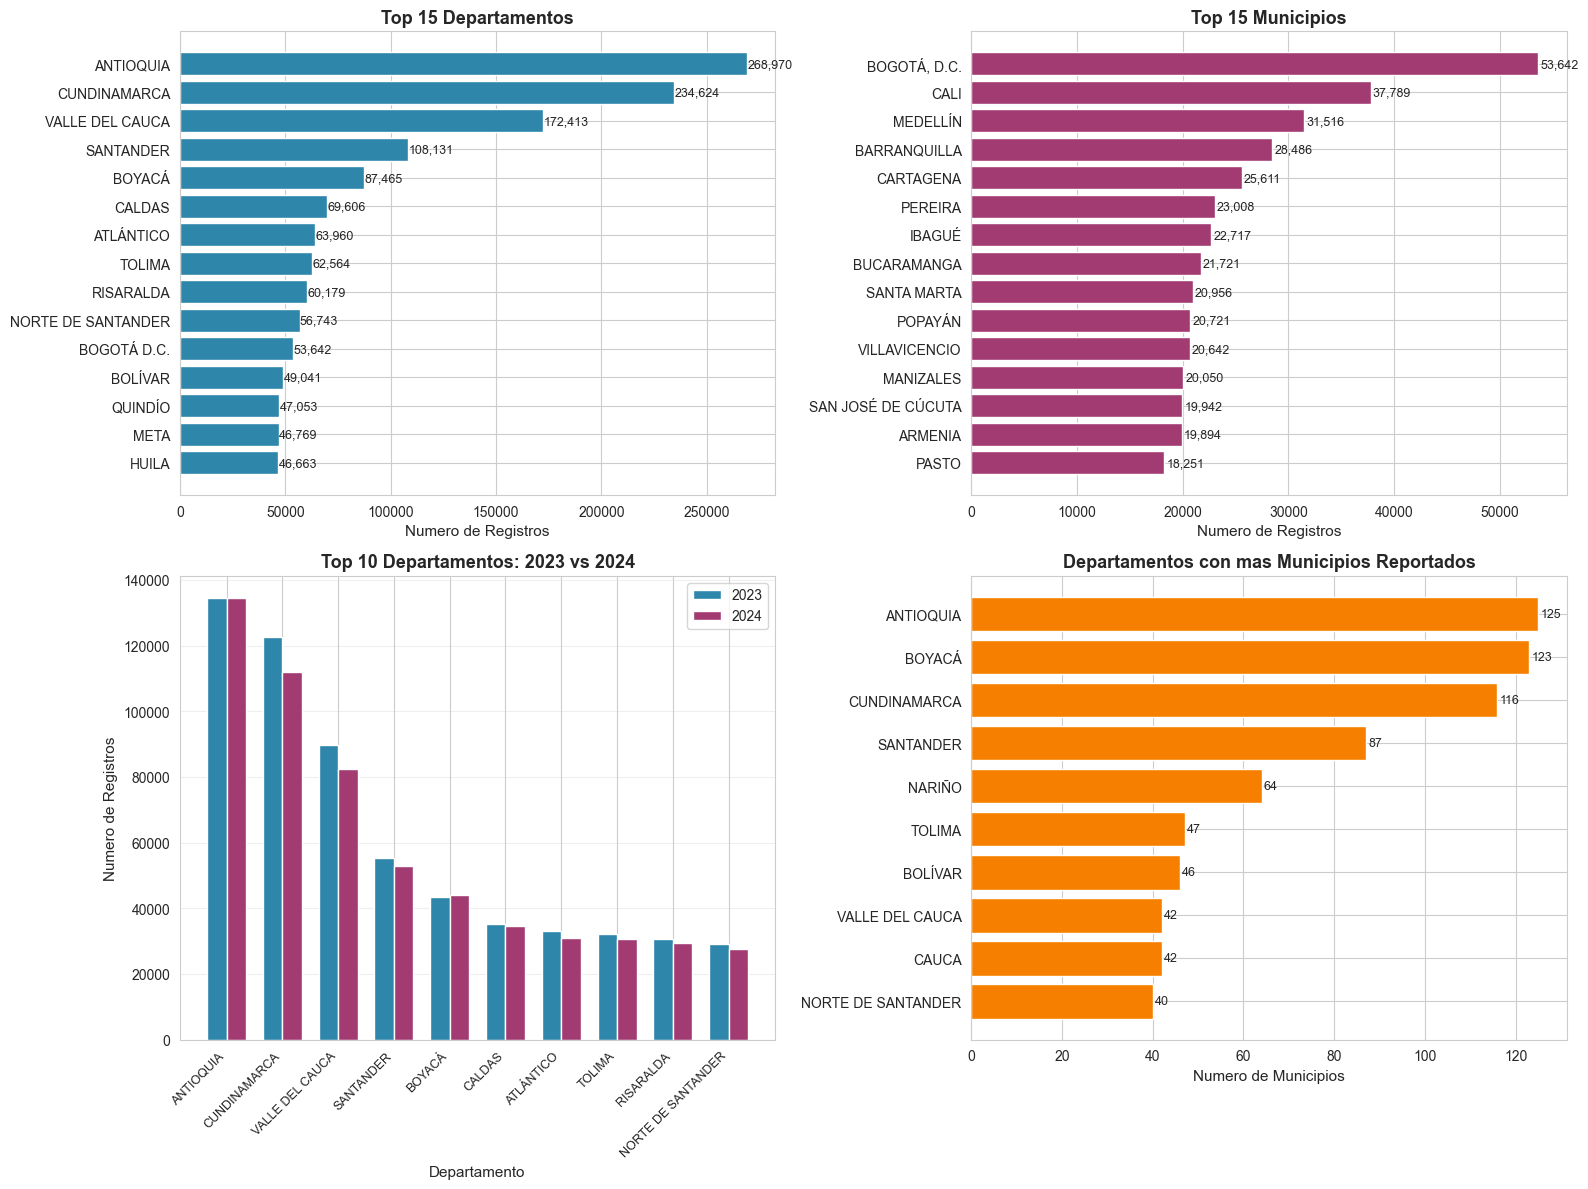

In [5]:
print("\n1.3 Distribucion por departamentos y municipios:")
print("-" * 80)

print(f"\nTotal departamentos: {df['DEPARTAMENTO'].nunique()}")
print(f"Total municipios: {df['MUNICIPIO'].nunique()}")

# Top 10 departamentos
print(f"\nTop 10 departamentos por numero de registros:")
top_deptos = df['DEPARTAMENTO'].value_counts().head(10)
for i, (depto, count) in enumerate(top_deptos.items(), 1):
    pct = count / len(df) * 100
    n_municipios = df[df['DEPARTAMENTO'] == depto]['MUNICIPIO'].nunique()
    n_empresas = df[df['DEPARTAMENTO'] == depto]['EMPRESA'].nunique()
    print(f"  {i:2d}. {depto:25s}: {count:>8,} ({pct:>5.2f}%) | {n_municipios:3d} mun. | {n_empresas:3d} emp.")

# Top 10 municipios
print(f"\nTop 10 municipios por numero de registros:")
top_municipios = df.groupby(['MUNICIPIO', 'DEPARTAMENTO']).size().sort_values(ascending=False).head(10)
for i, ((municipio, depto), count) in enumerate(top_municipios.items(), 1):
    pct = count / len(df) * 100
    n_empresas = df[(df['MUNICIPIO'] == municipio) & (df['DEPARTAMENTO'] == depto)]['EMPRESA'].nunique()
    print(f"  {i:2d}. {municipio:20s} ({depto:15s}): {count:>8,} ({pct:>5.2f}%) | {n_empresas:3d} emp.")

# Visualizacion
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 15 departamentos
top_15_deptos = df['DEPARTAMENTO'].value_counts().head(15)
axes[0, 0].barh(range(len(top_15_deptos)), top_15_deptos.values, color='#2E86AB')
axes[0, 0].set_yticks(range(len(top_15_deptos)))
axes[0, 0].set_yticklabels(top_15_deptos.index, fontsize=10)
axes[0, 0].set_xlabel('Numero de Registros', fontsize=11)
axes[0, 0].set_title('Top 15 Departamentos', fontsize=13, fontweight='bold')
axes[0, 0].invert_yaxis()
for i, v in enumerate(top_15_deptos.values):
    axes[0, 0].text(v + 200, i, f'{v:,}', va='center', fontsize=9)

# Top 15 municipios
top_15_mun = df['MUNICIPIO'].value_counts().head(15)
axes[0, 1].barh(range(len(top_15_mun)), top_15_mun.values, color='#A23B72')
axes[0, 1].set_yticks(range(len(top_15_mun)))
axes[0, 1].set_yticklabels(top_15_mun.index, fontsize=10)
axes[0, 1].set_xlabel('Numero de Registros', fontsize=11)
axes[0, 1].set_title('Top 15 Municipios', fontsize=13, fontweight='bold')
axes[0, 1].invert_yaxis()
for i, v in enumerate(top_15_mun.values):
    axes[0, 1].text(v + 200, i, f'{v:,}', va='center', fontsize=9)

# Registros por departamento - comparacion 2023 vs 2024
top_10_deptos_names = df['DEPARTAMENTO'].value_counts().head(10).index
df_top_deptos = df[df['DEPARTAMENTO'].isin(top_10_deptos_names)]
pivot_deptos = df_top_deptos.groupby(['DEPARTAMENTO', 'ANNO']).size().reset_index(name='count')
pivot_deptos = pivot_deptos.pivot(index='DEPARTAMENTO', columns='ANNO', values='count').fillna(0)
pivot_deptos = pivot_deptos.reindex(top_10_deptos_names)

x = np.arange(len(pivot_deptos))
width = 0.35
axes[1, 0].bar(x - width/2, pivot_deptos[2023], width, label='2023', color='#2E86AB')
axes[1, 0].bar(x + width/2, pivot_deptos[2024], width, label='2024', color='#A23B72')
axes[1, 0].set_xlabel('Departamento', fontsize=11)
axes[1, 0].set_ylabel('Numero de Registros', fontsize=11)
axes[1, 0].set_title('Top 10 Departamentos: 2023 vs 2024', fontsize=13, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(pivot_deptos.index, rotation=45, ha='right', fontsize=9)
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Distribucion de municipios por departamento (top 10)
mun_por_depto = df.groupby('DEPARTAMENTO')['MUNICIPIO'].nunique().sort_values(ascending=False).head(10)
axes[1, 1].barh(range(len(mun_por_depto)), mun_por_depto.values, color='#F77F00')
axes[1, 1].set_yticks(range(len(mun_por_depto)))
axes[1, 1].set_yticklabels(mun_por_depto.index, fontsize=10)
axes[1, 1].set_xlabel('Numero de Municipios', fontsize=11)
axes[1, 1].set_title('Departamentos con mas Municipios Reportados', fontsize=13, fontweight='bold')
axes[1, 1].invert_yaxis()
for i, v in enumerate(mun_por_depto.values):
    axes[1, 1].text(v + 0.5, i, str(v), va='center', fontsize=9)

plt.tight_layout()
plt.show()

### 1.4 Distribucion de servicios individuales vs empaquetados


1.4 Distribucion de servicios individuales vs empaquetados:
--------------------------------------------------------------------------------

Distribucion general:
  Individual     :    890,239 (50.85%)
  Empaquetado    :    860,420 (49.15%)

Distribucion por ano:

  2023:
    Empaquetado    :    469,122 (52.22%)
    Individual     :    429,196 (47.78%)

  2024:
    Empaquetado    :    391,298 (45.91%)
    Individual     :    461,043 (54.09%)

Detalle por tipo de servicio/paquete:
  [1] Internet fijo                                      (Individual ):   735,137 (41.99%)
  [2] Telefonía fija                                     (Individual ):    35,848 ( 2.05%)
  [3] Televisión por suscripción                         (Individual ):   119,254 ( 6.81%)
  [4] Duo Play 1 (Telefonía fija + Internet fijo)        (Empaquetado):   292,895 (16.73%)
  [5] Duo Play 2 (Internet fijo y TV por suscripción)    (Empaquetado):   190,681 (10.89%)
  [6] Duo Play 3 (Telefonía fija y TV por suscripción)   (

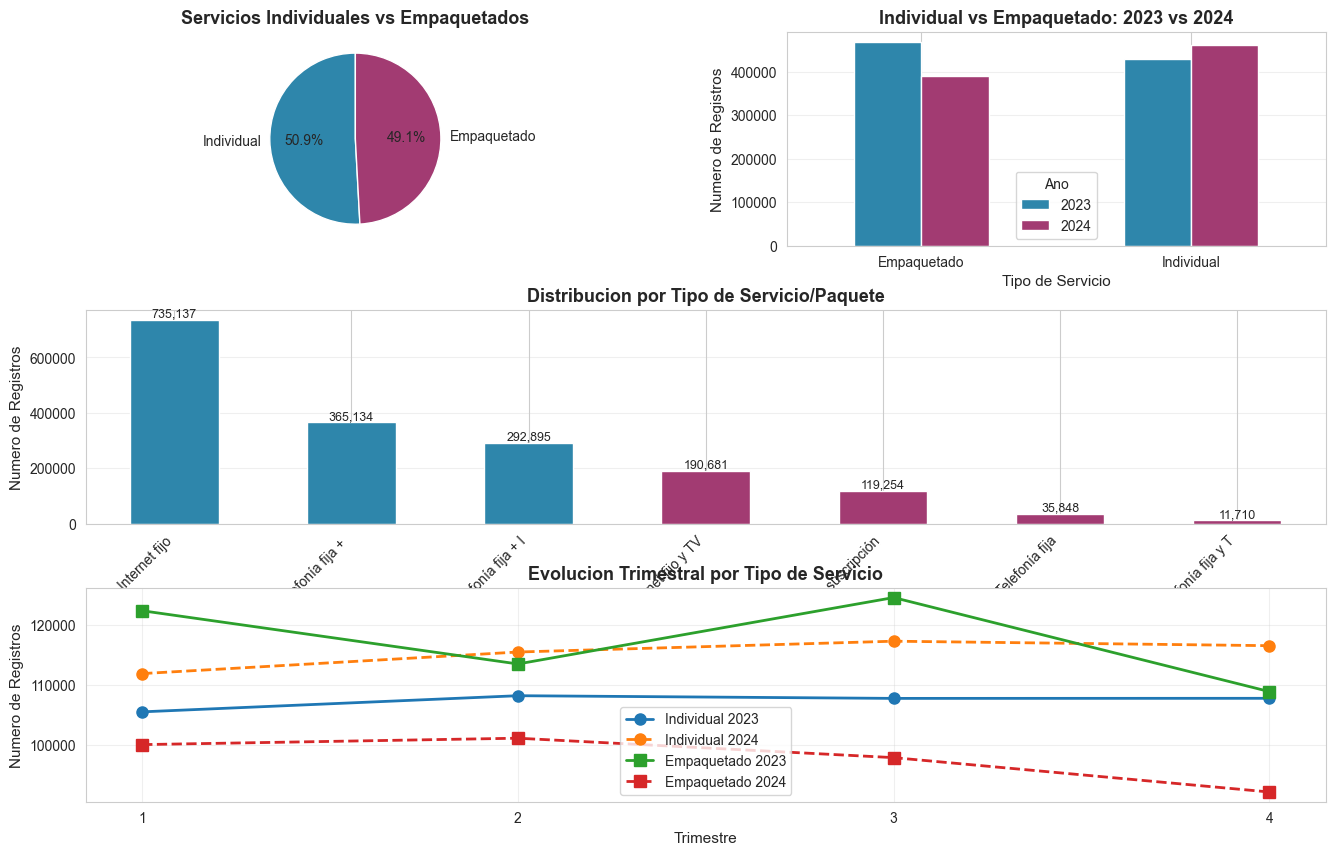

In [6]:
print("\n1.4 Distribucion de servicios individuales vs empaquetados:")
print("-" * 80)

# Clasificar servicios
servicios_individuales = [1, 2, 3]  # Internet, Telefonia, TV
servicios_empaquetados = [4, 5, 6, 7]  # Duo Play 1, 2, 3 y Triple Play

df['TIPO_SERVICIO'] = df['ID_SERVICIO_PAQUETE'].apply(
    lambda x: 'Individual' if x in servicios_individuales else 'Empaquetado'
)

# Conteo general
print(f"\nDistribucion general:")
tipo_servicio_count = df['TIPO_SERVICIO'].value_counts()
for tipo, count in tipo_servicio_count.items():
    pct = count / len(df) * 100
    print(f"  {tipo:15s}: {count:>10,} ({pct:>5.2f}%)")

# Por ano
print(f"\nDistribucion por ano:")
tipo_por_ano = df.groupby(['ANNO', 'TIPO_SERVICIO']).size().reset_index(name='count')
for ano in [2023, 2024]:
    print(f"\n  {ano}:")
    data_ano = tipo_por_ano[tipo_por_ano['ANNO'] == ano]
    total_ano = data_ano['count'].sum()
    for _, row in data_ano.iterrows():
        pct = row['count'] / total_ano * 100
        print(f"    {row['TIPO_SERVICIO']:15s}: {row['count']:>10,} ({pct:>5.2f}%)")

# Detalle por servicio
print(f"\nDetalle por tipo de servicio/paquete:")
servicio_detail = df.groupby(['ID_SERVICIO_PAQUETE', 'SERVICIO_PAQUETE', 'TIPO_SERVICIO']).size().reset_index(name='count')
servicio_detail = servicio_detail.sort_values('ID_SERVICIO_PAQUETE')
for _, row in servicio_detail.iterrows():
    pct = row['count'] / len(df) * 100
    print(f"  [{row['ID_SERVICIO_PAQUETE']}] {row['SERVICIO_PAQUETE']:50s} ({row['TIPO_SERVICIO']:11s}): {row['count']:>9,} ({pct:>5.2f}%)")

# Visualizacion
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(3, 2, figure=fig, hspace=0.3, wspace=0.3)

# Pie chart general
ax1 = fig.add_subplot(gs[0, 0])
colors_pie = ['#2E86AB', '#A23B72']
tipo_servicio_count.plot(kind='pie', ax=ax1, autopct='%1.1f%%', colors=colors_pie, startangle=90)
ax1.set_title('Servicios Individuales vs Empaquetados', fontsize=13, fontweight='bold')
ax1.set_ylabel('')

# Comparacion por ano
ax2 = fig.add_subplot(gs[0, 1])
pivot_tipo = tipo_por_ano.pivot(index='TIPO_SERVICIO', columns='ANNO', values='count')
pivot_tipo.plot(kind='bar', ax=ax2, color=['#2E86AB', '#A23B72'])
ax2.set_title('Individual vs Empaquetado: 2023 vs 2024', fontsize=13, fontweight='bold')
ax2.set_xlabel('Tipo de Servicio', fontsize=11)
ax2.set_ylabel('Numero de Registros', fontsize=11)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.legend(title='Ano')
ax2.grid(axis='y', alpha=0.3)

# Detalle por servicio/paquete
ax3 = fig.add_subplot(gs[1, :])
servicio_counts = df['SERVICIO_PAQUETE'].value_counts()
colors_bars = ['#2E86AB' if i < 3 else '#A23B72' for i in range(len(servicio_counts))]
servicio_counts.plot(kind='bar', ax=ax3, color=colors_bars)
ax3.set_title('Distribucion por Tipo de Servicio/Paquete', fontsize=13, fontweight='bold')
ax3.set_xlabel('Servicio/Paquete', fontsize=11)
ax3.set_ylabel('Numero de Registros', fontsize=11)
ax3.set_xticklabels([s[:30] for s in servicio_counts.index], rotation=45, ha='right', fontsize=10)
ax3.grid(axis='y', alpha=0.3)
for i, v in enumerate(servicio_counts.values):
    ax3.text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontsize=9)

# Evolucion trimestral
ax4 = fig.add_subplot(gs[2, :])
trim_tipo = df.groupby(['ANNO', 'TRIMESTRE', 'TIPO_SERVICIO']).size().reset_index(name='count')
for tipo in ['Individual', 'Empaquetado']:
    for ano in [2023, 2024]:
        data = trim_tipo[(trim_tipo['TIPO_SERVICIO'] == tipo) & (trim_tipo['ANNO'] == ano)]
        label = f'{tipo} {ano}'
        marker = 'o' if tipo == 'Individual' else 's'
        linestyle = '-' if ano == 2023 else '--'
        ax4.plot(data['TRIMESTRE'], data['count'], marker=marker, linewidth=2, 
                label=label, markersize=8, linestyle=linestyle)
ax4.set_title('Evolucion Trimestral por Tipo de Servicio', fontsize=13, fontweight='bold')
ax4.set_xlabel('Trimestre', fontsize=11)
ax4.set_ylabel('Numero de Registros', fontsize=11)
ax4.set_xticks([1, 2, 3, 4])
ax4.legend(loc='best', fontsize=10)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2. ANALISIS EXPLORATORIO INICIAL

### 2.1 Tipos de paquetes mas comunes


2. ANALISIS EXPLORATORIO INICIAL

2.1 Tipos de paquetes mas comunes:
--------------------------------------------------------------------------------

Total servicios empaquetados: 860,420 (49.15% del total)

Distribucion por tipo de paquete:
  Duo Play       :    495,286 (57.56%)
  Triple Play    :    365,134 (42.44%)

Detalle de Duo Play:
  [4] Duo Play 1 (Telefonía fija + Internet fijo)       :   292,895 (59.14%)
  [5] Duo Play 2 (Internet fijo y TV por suscripción)   :   190,681 (38.50%)
  [6] Duo Play 3 (Telefonía fija y TV por suscripción)  :    11,710 ( 2.36%)

Distribucion por ano:

  2023:
    Duo Play       :    273,549 (58.31%)
    Triple Play    :    195,573 (41.69%)

  2024:
    Duo Play       :    221,737 (56.67%)
    Triple Play    :    169,561 (43.33%)


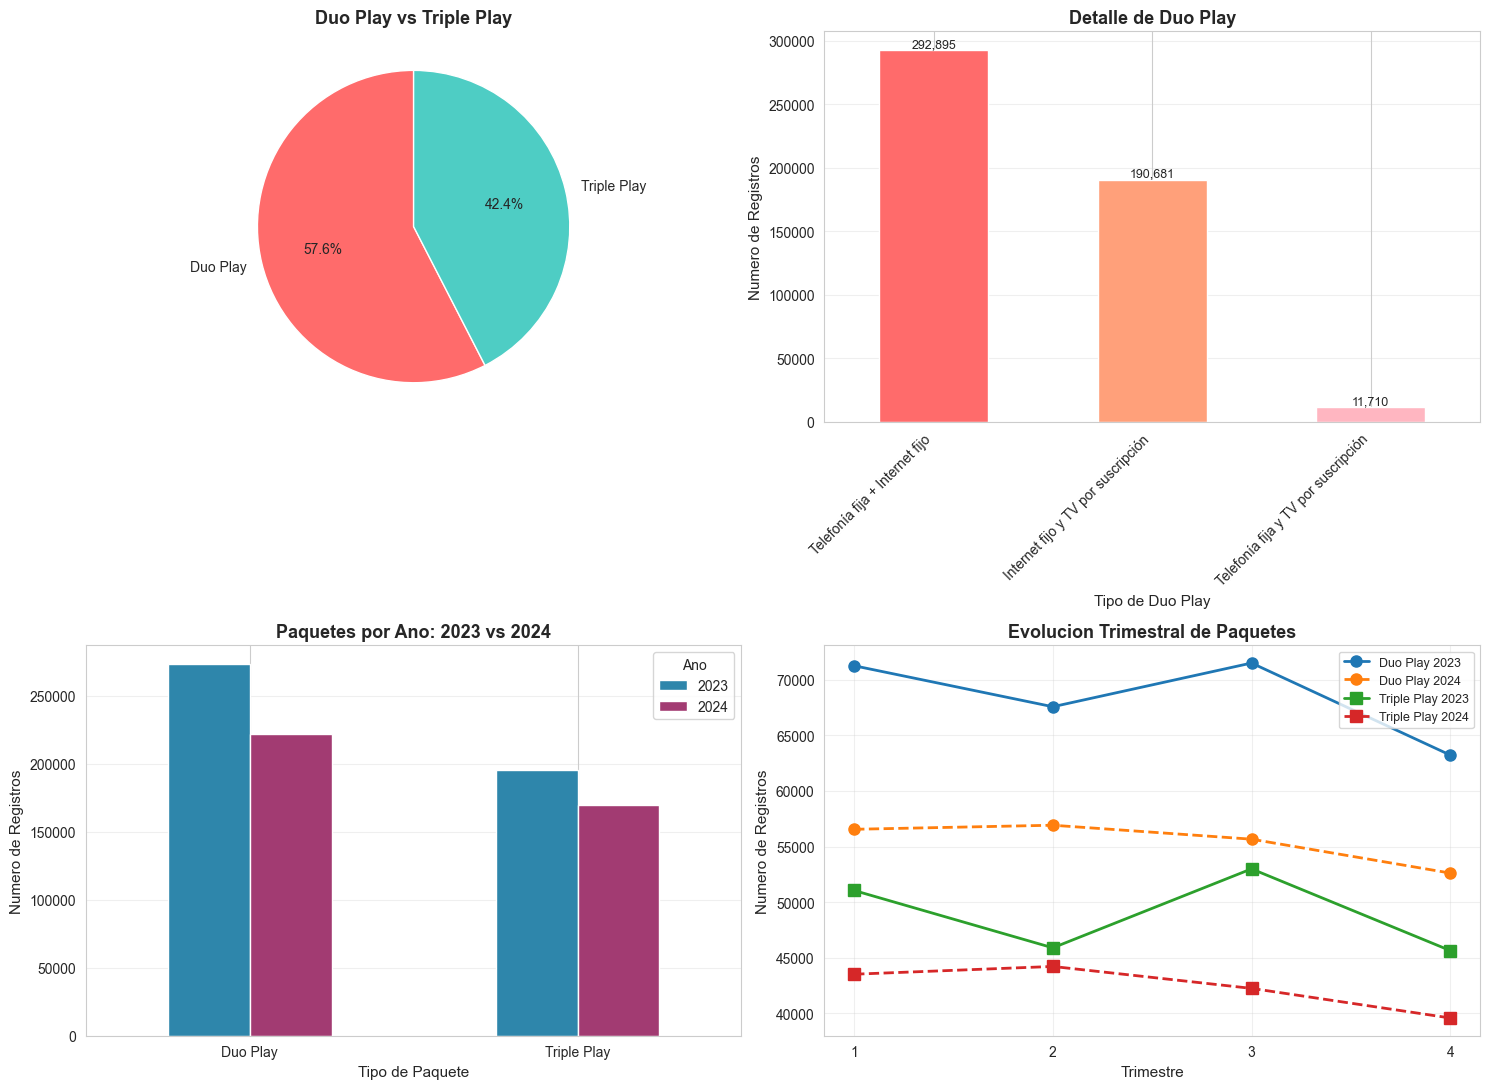

In [7]:
print("\n" + "="*80)
print("2. ANALISIS EXPLORATORIO INICIAL")
print("="*80)

print("\n2.1 Tipos de paquetes mas comunes:")
print("-" * 80)

# Filtrar solo empaquetados
df_empaquetados = df[df['TIPO_SERVICIO'] == 'Empaquetado'].copy()

# Clasificar tipos de paquetes
paquete_clasificacion = {
    4: 'Duo Play',
    5: 'Duo Play',
    6: 'Duo Play',
    7: 'Triple Play'
}

df_empaquetados['TIPO_PAQUETE'] = df_empaquetados['ID_SERVICIO_PAQUETE'].map(paquete_clasificacion)

print(f"\nTotal servicios empaquetados: {len(df_empaquetados):,} ({len(df_empaquetados)/len(df)*100:.2f}% del total)")

# Distribucion general
print(f"\nDistribucion por tipo de paquete:")
tipo_paquete_count = df_empaquetados['TIPO_PAQUETE'].value_counts()
for tipo, count in tipo_paquete_count.items():
    pct = count / len(df_empaquetados) * 100
    print(f"  {tipo:15s}: {count:>10,} ({pct:>5.2f}%)")

# Detalle de Duo Play
print(f"\nDetalle de Duo Play:")
duo_play_detail = df_empaquetados[df_empaquetados['TIPO_PAQUETE'] == 'Duo Play'].groupby(
    ['ID_SERVICIO_PAQUETE', 'SERVICIO_PAQUETE']
).size().reset_index(name='count').sort_values('count', ascending=False)
for _, row in duo_play_detail.iterrows():
    pct = row['count'] / df_empaquetados[df_empaquetados['TIPO_PAQUETE'] == 'Duo Play'].shape[0] * 100
    print(f"  [{row['ID_SERVICIO_PAQUETE']}] {row['SERVICIO_PAQUETE']:50s}: {row['count']:>9,} ({pct:>5.2f}%)")

# Por ano
print(f"\nDistribucion por ano:")
for ano in [2023, 2024]:
    print(f"\n  {ano}:")
    df_ano = df_empaquetados[df_empaquetados['ANNO'] == ano]
    tipo_count_ano = df_ano['TIPO_PAQUETE'].value_counts()
    for tipo, count in tipo_count_ano.items():
        pct = count / len(df_ano) * 100
        print(f"    {tipo:15s}: {count:>10,} ({pct:>5.2f}%)")

# Visualizacion
fig, axes = plt.subplots(2, 2, figsize=(15, 11))

# Pie chart Duo Play vs Triple Play
ax1 = axes[0, 0]
colors = ['#FF6B6B', '#4ECDC4']
tipo_paquete_count.plot(kind='pie', ax=ax1, autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Duo Play vs Triple Play', fontsize=13, fontweight='bold')
ax1.set_ylabel('')

# Detalle Duo Play
ax2 = axes[0, 1]
duo_play_counts = df_empaquetados[df_empaquetados['TIPO_PAQUETE'] == 'Duo Play']['SERVICIO_PAQUETE'].value_counts()
duo_play_counts.plot(kind='bar', ax=ax2, color=['#FF6B6B', '#FFA07A', '#FFB6C1'])
ax2.set_title('Detalle de Duo Play', fontsize=13, fontweight='bold')
ax2.set_xlabel('Tipo de Duo Play', fontsize=11)
ax2.set_ylabel('Numero de Registros', fontsize=11)
ax2.set_xticklabels([s.split('(')[1].replace(')', '') if '(' in s else s for s in duo_play_counts.index], 
                      rotation=45, ha='right', fontsize=10)
ax2.grid(axis='y', alpha=0.3)
for i, v in enumerate(duo_play_counts.values):
    ax2.text(i, v + 200, f'{v:,}', ha='center', va='bottom', fontsize=9)

# Comparacion 2023 vs 2024
ax3 = axes[1, 0]
tipo_ano = df_empaquetados.groupby(['ANNO', 'TIPO_PAQUETE']).size().reset_index(name='count')
pivot_tipo_ano = tipo_ano.pivot(index='TIPO_PAQUETE', columns='ANNO', values='count')
pivot_tipo_ano.plot(kind='bar', ax=ax3, color=['#2E86AB', '#A23B72'])
ax3.set_title('Paquetes por Ano: 2023 vs 2024', fontsize=13, fontweight='bold')
ax3.set_xlabel('Tipo de Paquete', fontsize=11)
ax3.set_ylabel('Numero de Registros', fontsize=11)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.legend(title='Ano')
ax3.grid(axis='y', alpha=0.3)

# Evolucion trimestral
ax4 = axes[1, 1]
trim_paquete = df_empaquetados.groupby(['ANNO', 'TRIMESTRE', 'TIPO_PAQUETE']).size().reset_index(name='count')
for tipo in ['Duo Play', 'Triple Play']:
    for ano in [2023, 2024]:
        data = trim_paquete[(trim_paquete['TIPO_PAQUETE'] == tipo) & (trim_paquete['ANNO'] == ano)]
        label = f'{tipo} {ano}'
        marker = 'o' if tipo == 'Duo Play' else 's'
        linestyle = '-' if ano == 2023 else '--'
        ax4.plot(data['TRIMESTRE'], data['count'], marker=marker, linewidth=2, 
                label=label, markersize=8, linestyle=linestyle)
ax4.set_title('Evolucion Trimestral de Paquetes', fontsize=13, fontweight='bold')
ax4.set_xlabel('Trimestre', fontsize=11)
ax4.set_ylabel('Numero de Registros', fontsize=11)
ax4.set_xticks([1, 2, 3, 4])
ax4.legend(loc='best', fontsize=9)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.2 Frecuencia por tecnologia


2.2 Frecuencia por tecnologia:
--------------------------------------------------------------------------------

Total registros con tecnologia definida: 1,750,659 (100.00%)
Registros con NA: 0 (0.00%)

Top 10 tecnologias:
   1. Fiber to the home (FTTH)                :    560,296 (32.00%)
   2. Hybrid Fiber Coaxial (HFC)              :    305,257 (17.44%)
   3. Cable                                   :    270,959 (15.48%)
   4. xDSL                                    :    181,796 (10.38%)
   5. Otras tecnologías inalámbricas          :     95,105 ( 5.43%)
   6. WiFi                                    :     48,014 ( 2.74%)
   7. Satelital                               :     44,700 ( 2.55%)
   8. Otras tecnologías de fibra (antes FTTx) :     43,262 ( 2.47%)
   9. Fiber to the premises                   :      8,398 ( 0.48%)
  10. Fiber to the building o fiber to the basement (FTTB):      8,391 ( 0.48%)

Top 5 tecnologias por ano:

  2023:
    1. Cable                                   

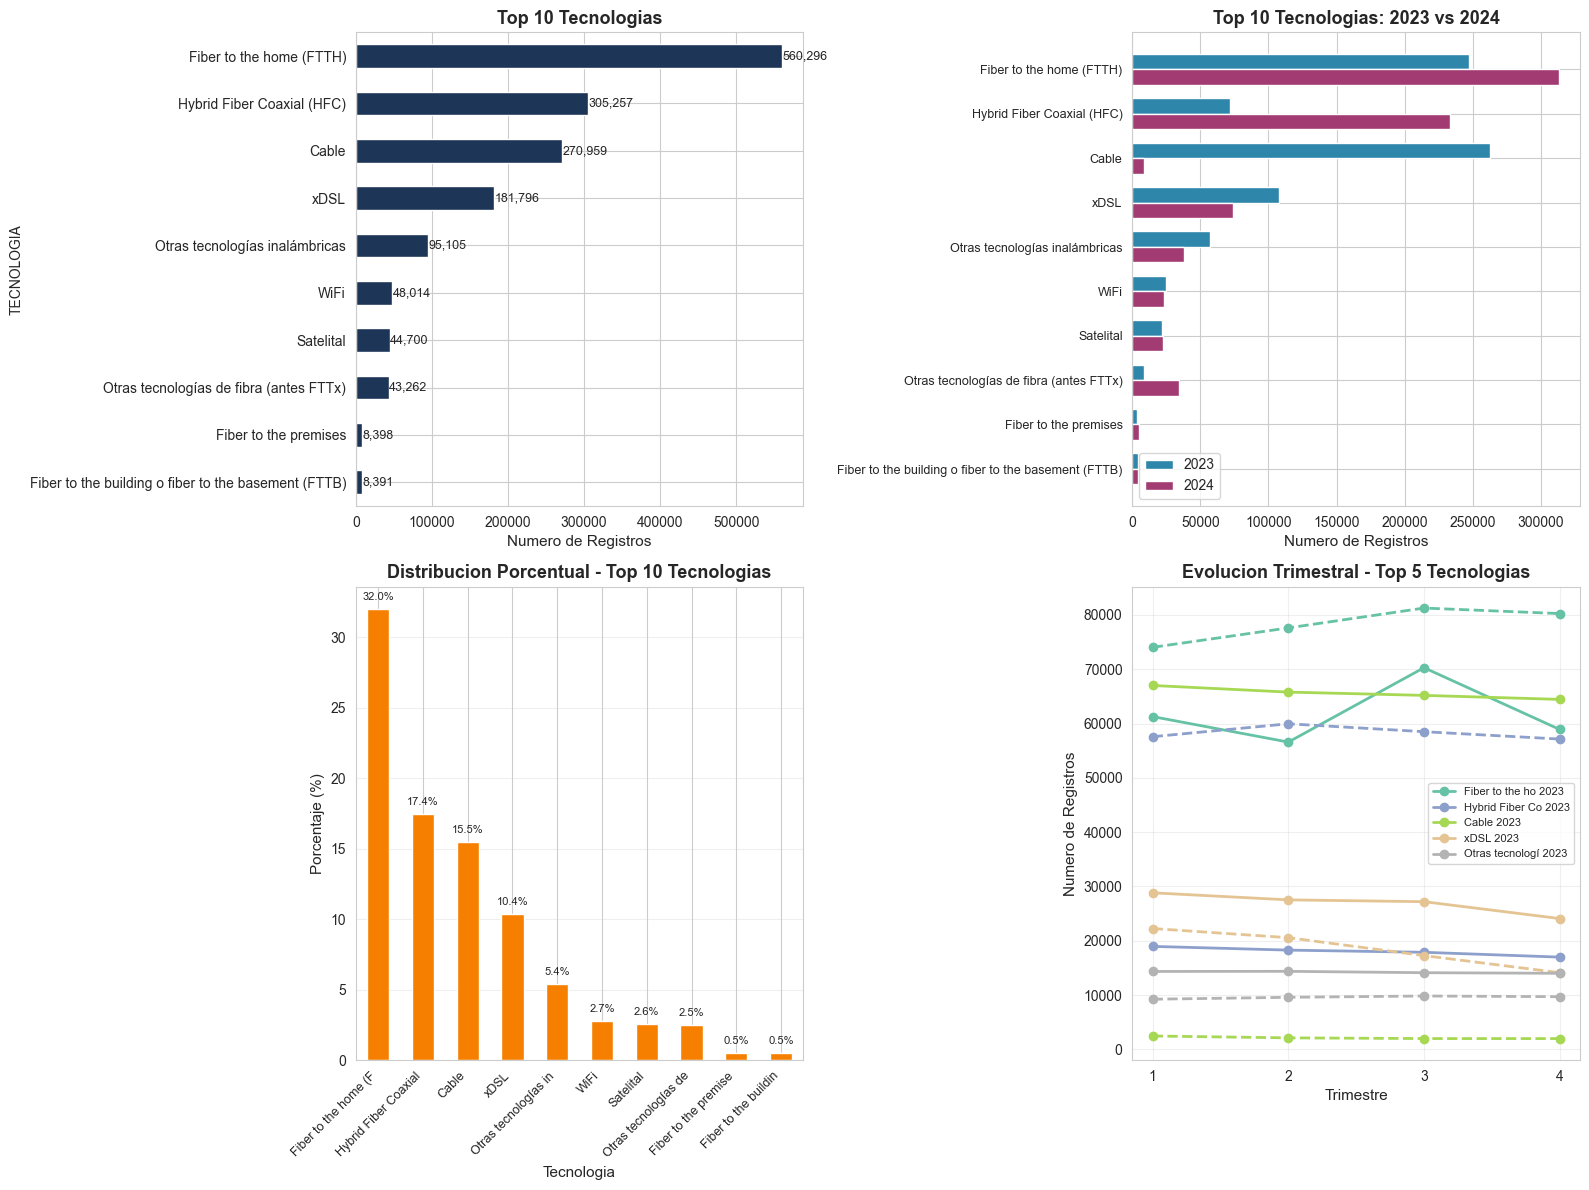

In [8]:
print("\n2.2 Frecuencia por tecnologia:")
print("-" * 80)

# Tecnologias (excluyendo NA)
df_con_tech = df[df['TECNOLOGIA'] != 'NA'].copy()

print(f"\nTotal registros con tecnologia definida: {len(df_con_tech):,} ({len(df_con_tech)/len(df)*100:.2f}%)")
print(f"Registros con NA: {len(df[df['TECNOLOGIA'] == 'NA']):,} ({len(df[df['TECNOLOGIA'] == 'NA'])/len(df)*100:.2f}%)")

# Top tecnologias
print(f"\nTop 10 tecnologias:")
top_tech = df_con_tech['TECNOLOGIA'].value_counts().head(10)
for i, (tech, count) in enumerate(top_tech.items(), 1):
    pct = count / len(df_con_tech) * 100
    print(f"  {i:2d}. {tech:40s}: {count:>10,} ({pct:>5.2f}%)")

# Por ano
print(f"\nTop 5 tecnologias por ano:")
for ano in [2023, 2024]:
    print(f"\n  {ano}:")
    df_ano_tech = df_con_tech[df_con_tech['ANNO'] == ano]
    top_tech_ano = df_ano_tech['TECNOLOGIA'].value_counts().head(5)
    for i, (tech, count) in enumerate(top_tech_ano.items(), 1):
        pct = count / len(df_ano_tech) * 100
        print(f"    {i}. {tech:40s}: {count:>10,} ({pct:>5.2f}%)")

# Visualizacion
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 10 tecnologias
ax1 = axes[0, 0]
top_tech.plot(kind='barh', ax=ax1, color='#1D3557')
ax1.set_xlabel('Numero de Registros', fontsize=11)
ax1.set_title('Top 10 Tecnologias', fontsize=13, fontweight='bold')
ax1.invert_yaxis()
for i, v in enumerate(top_tech.values):
    ax1.text(v + 500, i, f'{v:,}', va='center', fontsize=9)

# Comparacion 2023 vs 2024 - Top 10
ax2 = axes[0, 1]
top_10_tech_names = df_con_tech['TECNOLOGIA'].value_counts().head(10).index
df_top_tech = df_con_tech[df_con_tech['TECNOLOGIA'].isin(top_10_tech_names)]
tech_ano = df_top_tech.groupby(['TECNOLOGIA', 'ANNO']).size().reset_index(name='count')
pivot_tech = tech_ano.pivot(index='TECNOLOGIA', columns='ANNO', values='count').fillna(0)
pivot_tech = pivot_tech.reindex(top_10_tech_names)
x = np.arange(len(pivot_tech))
width = 0.35
ax2.barh(x - width/2, pivot_tech[2023], width, label='2023', color='#2E86AB')
ax2.barh(x + width/2, pivot_tech[2024], width, label='2024', color='#A23B72')
ax2.set_yticks(x)
ax2.set_yticklabels(pivot_tech.index, fontsize=9)
ax2.set_xlabel('Numero de Registros', fontsize=11)
ax2.set_title('Top 10 Tecnologias: 2023 vs 2024', fontsize=13, fontweight='bold')
ax2.legend()
ax2.invert_yaxis()

# Distribucion porcentual
ax3 = axes[1, 0]
tech_pct = (df_con_tech['TECNOLOGIA'].value_counts().head(10) / len(df_con_tech) * 100)
tech_pct.plot(kind='bar', ax=ax3, color='#F77F00')
ax3.set_xlabel('Tecnologia', fontsize=11)
ax3.set_ylabel('Porcentaje (%)', fontsize=11)
ax3.set_title('Distribucion Porcentual - Top 10 Tecnologias', fontsize=13, fontweight='bold')
ax3.set_xticklabels([t[:20] for t in tech_pct.index], rotation=45, ha='right', fontsize=9)
ax3.grid(axis='y', alpha=0.3)
for i, v in enumerate(tech_pct.values):
    ax3.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=8)

# Evolucion trimestral - Top 5
ax4 = axes[1, 1]
top_5_tech = df_con_tech['TECNOLOGIA'].value_counts().head(5).index
trim_tech = df_con_tech[df_con_tech['TECNOLOGIA'].isin(top_5_tech)].groupby(
    ['ANNO', 'TRIMESTRE', 'TECNOLOGIA']
).size().reset_index(name='count')
colors_tech = plt.cm.Set2(np.linspace(0, 1, 5))
for i, tech in enumerate(top_5_tech):
    for ano in [2023, 2024]:
        data = trim_tech[(trim_tech['TECNOLOGIA'] == tech) & (trim_tech['ANNO'] == ano)]
        if not data.empty:
            label = f'{tech[:15]} {ano}' if ano == 2023 else None
            linestyle = '-' if ano == 2023 else '--'
            ax4.plot(data['TRIMESTRE'], data['count'], marker='o', linewidth=2, 
                    label=label, color=colors_tech[i], linestyle=linestyle, markersize=6)
ax4.set_title('Evolucion Trimestral - Top 5 Tecnologias', fontsize=13, fontweight='bold')
ax4.set_xlabel('Trimestre', fontsize=11)
ax4.set_ylabel('Numero de Registros', fontsize=11)
ax4.set_xticks([1, 2, 3, 4])
ax4.legend(loc='best', fontsize=8, ncol=1)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.3 Comparacion entre 2023 y 2024


2.3 Comparacion entre 2023 y 2024:
--------------------------------------------------------------------------------

Comparacion de metricas clave:
--------------------------------------------------------------------------------
Metrica                                   2023            2024       Variacion      Var %
--------------------------------------------------------------------------------
Registros                              898,318         852,341         -45,977     -5.12%
Lineas totales                      45,674,141      43,981,584      -1,692,557     -3.71%
Valor facturado (COP)          $8,454,578,603,153 $11,169,360,957,104 $2,714,782,353,951     32.11%
Operadores                               1,290           1,423             133     10.31%
Departamentos                               33              33               0      0.00%
Municipios                               1,036           1,037               1      0.10%


Comparacion por segmento:
---------------------

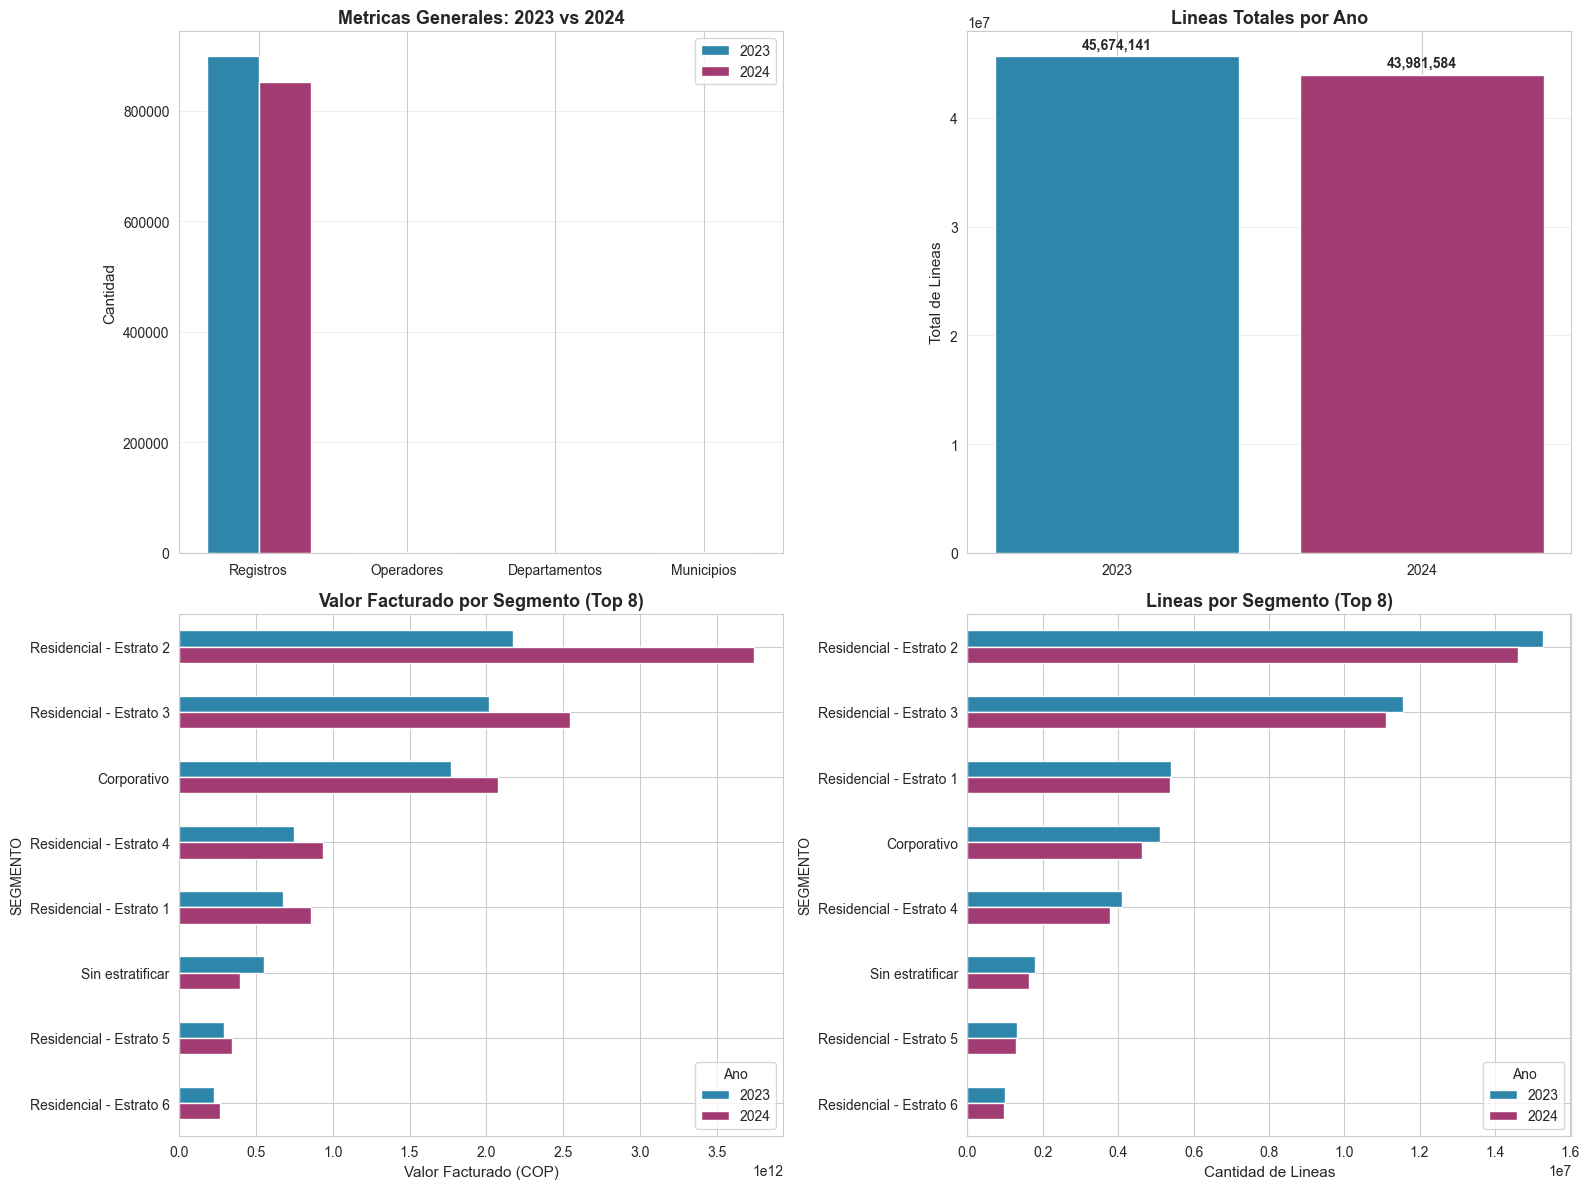

In [9]:
print("\n2.3 Comparacion entre 2023 y 2024:")
print("-" * 80)

# Metricas generales
metricas = {}
for ano in [2023, 2024]:
    df_ano = df[df['ANNO'] == ano]
    metricas[ano] = {
        'registros': len(df_ano),
        'lineas': df_ano['CANTIDAD_LINEAS_ACCESOS'].sum(),
        'valor_facturado': df_ano['VALOR_FACTURADO_O_COBRADO'].sum(),
        'operadores': df_ano['EMPRESA'].nunique(),
        'departamentos': df_ano['DEPARTAMENTO'].nunique(),
        'municipios': df_ano['MUNICIPIO'].nunique()
    }

print("\nComparacion de metricas clave:")
print("-" * 80)
print(f"{'Metrica':<30} {'2023':>15} {'2024':>15} {'Variacion':>15} {'Var %':>10}")
print("-" * 80)

metricas_nombres = {
    'registros': 'Registros',
    'lineas': 'Lineas totales',
    'valor_facturado': 'Valor facturado (COP)',
    'operadores': 'Operadores',
    'departamentos': 'Departamentos',
    'municipios': 'Municipios'
}

for key, nombre in metricas_nombres.items():
    val_2023 = metricas[2023][key]
    val_2024 = metricas[2024][key]
    diff = val_2024 - val_2023
    diff_pct = (diff / val_2023 * 100) if val_2023 > 0 else 0
    
    if key == 'valor_facturado':
        print(f"{nombre:<30} ${val_2023:>14,} ${val_2024:>14,} ${diff:>14,} {diff_pct:>9.2f}%")
    else:
        print(f"{nombre:<30} {val_2023:>15,} {val_2024:>15,} {diff:>15,} {diff_pct:>9.2f}%")

# Analisis por segmento
print("\n\nComparacion por segmento:")
print("-" * 80)
segmento_comp = df.groupby(['ANNO', 'SEGMENTO']).agg({
    'CANTIDAD_LINEAS_ACCESOS': 'sum',
    'VALOR_FACTURADO_O_COBRADO': 'sum'
}).reset_index()

for segmento in df['SEGMENTO'].unique():
    print(f"\n{segmento}:")
    seg_2023 = segmento_comp[(segmento_comp['ANNO'] == 2023) & (segmento_comp['SEGMENTO'] == segmento)]
    seg_2024 = segmento_comp[(segmento_comp['ANNO'] == 2024) & (segmento_comp['SEGMENTO'] == segmento)]
    
    if not seg_2023.empty and not seg_2024.empty:
        lineas_2023 = seg_2023['CANTIDAD_LINEAS_ACCESOS'].values[0]
        lineas_2024 = seg_2024['CANTIDAD_LINEAS_ACCESOS'].values[0]
        valor_2023 = seg_2023['VALOR_FACTURADO_O_COBRADO'].values[0]
        valor_2024 = seg_2024['VALOR_FACTURADO_O_COBRADO'].values[0]
        
        diff_lineas = lineas_2024 - lineas_2023
        diff_lineas_pct = (diff_lineas / lineas_2023 * 100) if lineas_2023 > 0 else 0
        diff_valor = valor_2024 - valor_2023
        diff_valor_pct = (diff_valor / valor_2023 * 100) if valor_2023 > 0 else 0
        
        print(f"  Lineas: {lineas_2023:,} -> {lineas_2024:,} ({diff_lineas_pct:+.2f}%)")
        print(f"  Valor: ${valor_2023:,} -> ${valor_2024:,} ({diff_valor_pct:+.2f}%)")

# Visualizacion
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Metricas generales
ax1 = axes[0, 0]
metricas_viz = ['registros', 'operadores', 'departamentos', 'municipios']
nombres_viz = ['Registros', 'Operadores', 'Departamentos', 'Municipios']
x = np.arange(len(metricas_viz))
width = 0.35
vals_2023 = [metricas[2023][m] for m in metricas_viz]
vals_2024 = [metricas[2024][m] for m in metricas_viz]
ax1.bar(x - width/2, vals_2023, width, label='2023', color='#2E86AB')
ax1.bar(x + width/2, vals_2024, width, label='2024', color='#A23B72')
ax1.set_ylabel('Cantidad', fontsize=11)
ax1.set_title('Metricas Generales: 2023 vs 2024', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(nombres_viz, fontsize=10)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Lineas por ano
ax2 = axes[0, 1]
lineas_data = [metricas[2023]['lineas'], metricas[2024]['lineas']]
ax2.bar(['2023', '2024'], lineas_data, color=['#2E86AB', '#A23B72'])
ax2.set_ylabel('Total de Lineas', fontsize=11)
ax2.set_title('Lineas Totales por Ano', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for i, v in enumerate(lineas_data):
    ax2.text(i, v + v*0.01, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Valor facturado por segmento
ax3 = axes[1, 0]
pivot_seg_valor = segmento_comp.pivot(index='SEGMENTO', columns='ANNO', values='VALOR_FACTURADO_O_COBRADO').fillna(0)
pivot_seg_valor = pivot_seg_valor.sort_values(2024, ascending=False).head(8)
pivot_seg_valor.plot(kind='barh', ax=ax3, color=['#2E86AB', '#A23B72'])
ax3.set_xlabel('Valor Facturado (COP)', fontsize=11)
ax3.set_title('Valor Facturado por Segmento (Top 8)', fontsize=13, fontweight='bold')
ax3.legend(title='Ano')
ax3.invert_yaxis()

# Lineas por segmento
ax4 = axes[1, 1]
pivot_seg_lineas = segmento_comp.pivot(index='SEGMENTO', columns='ANNO', values='CANTIDAD_LINEAS_ACCESOS').fillna(0)
pivot_seg_lineas = pivot_seg_lineas.sort_values(2024, ascending=False).head(8)
pivot_seg_lineas.plot(kind='barh', ax=ax4, color=['#2E86AB', '#A23B72'])
ax4.set_xlabel('Cantidad de Lineas', fontsize=11)
ax4.set_title('Lineas por Segmento (Top 8)', fontsize=13, fontweight='bold')
ax4.legend(title='Ano')
ax4.invert_yaxis()

plt.tight_layout()
plt.show()

## 3. ANALISIS DEL VALOR FACTURADO

### 3.1 Distribucion del valor facturado por paquete


3. ANALISIS DEL VALOR FACTURADO

3.1 Distribucion del valor facturado por paquete:
--------------------------------------------------------------------------------

Valor facturado por servicio/paquete:
                                                                           Total      Media    Mediana  Registros
SERVICIO_PAQUETE                                                                                                 
Triple Play (Telefonía fija + Internet fijo + TV por suscripción)  7516410199122 20,585,347 789,434.00     365134
Internet fijo                                                      6159746903937  8,379,046 862,901.00     735137
Duo Play 1 (Telefonía fija + Internet fijo)                        2424501978511  8,277,717 466,305.00     292895
Televisión por suscripción                                         1895360013766 15,893,471  1,083,814     119254
Duo Play 2 (Internet fijo y TV por suscripción)                    1174508772768  6,159,548 563,860.00     19068

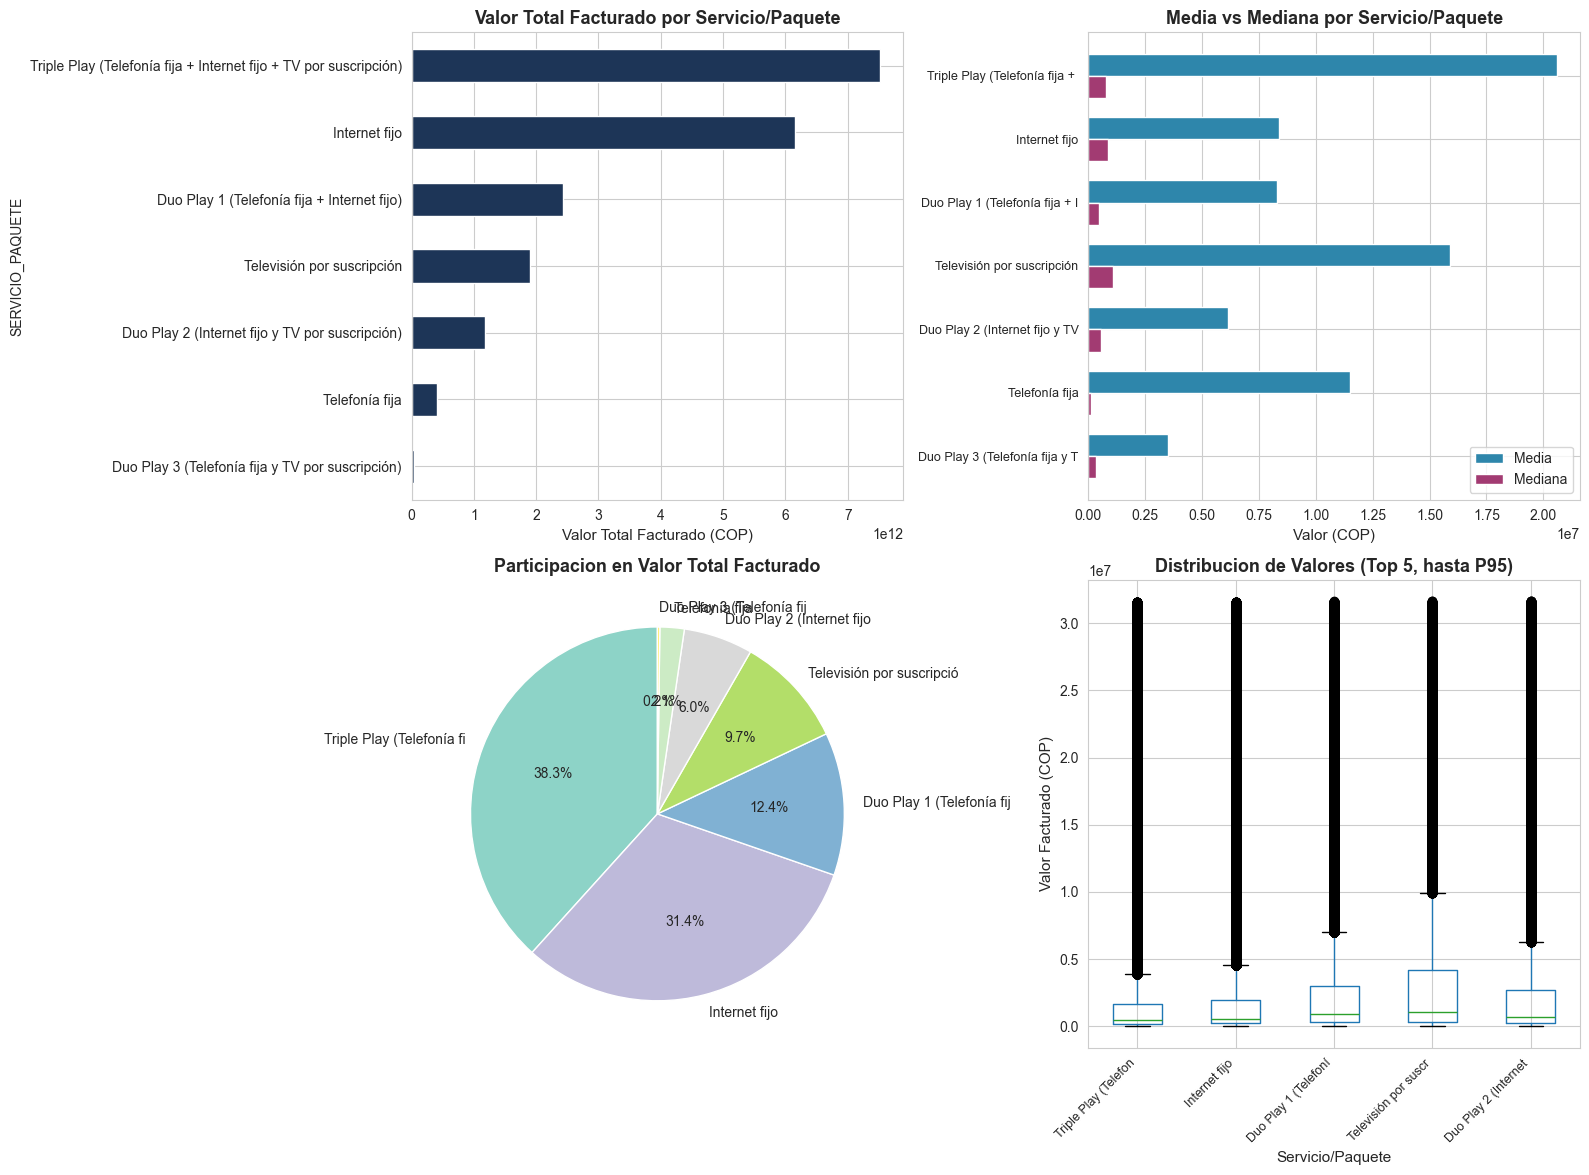

In [10]:
print("\n" + "="*80)
print("3. ANALISIS DEL VALOR FACTURADO")
print("="*80)

print("\n3.1 Distribucion del valor facturado por paquete:")
print("-" * 80)

# Estadisticas por servicio/paquete
valor_por_servicio = df.groupby('SERVICIO_PAQUETE').agg({
    'VALOR_FACTURADO_O_COBRADO': ['sum', 'mean', 'median', 'count']
}).round(0)

valor_por_servicio.columns = ['Total', 'Media', 'Mediana', 'Registros']
valor_por_servicio = valor_por_servicio.sort_values('Total', ascending=False)

print("\nValor facturado por servicio/paquete:")
print(valor_por_servicio.to_string())

print("\n\nParticipacion en el valor total facturado:")
total_facturado = df['VALOR_FACTURADO_O_COBRADO'].sum()
for servicio in valor_por_servicio.index:
    valor = valor_por_servicio.loc[servicio, 'Total']
    pct = (valor / total_facturado) * 100
    print(f"  {servicio:50s}: ${valor:>15,.0f} ({pct:>5.2f}%)")

# Visualizacion
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Total facturado por servicio
ax1 = axes[0, 0]
valor_por_servicio['Total'].plot(kind='barh', ax=ax1, color='#1D3557')
ax1.set_xlabel('Valor Total Facturado (COP)', fontsize=11)
ax1.set_title('Valor Total Facturado por Servicio/Paquete', fontsize=13, fontweight='bold')
ax1.invert_yaxis()

# Media vs Mediana
ax2 = axes[0, 1]
x = np.arange(len(valor_por_servicio))
width = 0.35
ax2.barh(x - width/2, valor_por_servicio['Media'], width, label='Media', color='#2E86AB')
ax2.barh(x + width/2, valor_por_servicio['Mediana'], width, label='Mediana', color='#A23B72')
ax2.set_yticks(x)
ax2.set_yticklabels([s[:30] for s in valor_por_servicio.index], fontsize=9)
ax2.set_xlabel('Valor (COP)', fontsize=11)
ax2.set_title('Media vs Mediana por Servicio/Paquete', fontsize=13, fontweight='bold')
ax2.legend()
ax2.invert_yaxis()

# Pie chart participacion
ax3 = axes[1, 0]
participacion = (valor_por_servicio['Total'] / total_facturado * 100).sort_values(ascending=False)
colors = plt.cm.Set3(np.linspace(0, 1, len(participacion)))
ax3.pie(participacion.values, labels=[s[:25] for s in participacion.index], autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax3.set_title('Participacion en Valor Total Facturado', fontsize=13, fontweight='bold')

# Boxplot por servicio (top 5)
ax4 = axes[1, 1]
top_5_servicios = valor_por_servicio.head(5).index
df_top_5 = df[df['SERVICIO_PAQUETE'].isin(top_5_servicios)]
# Filtrar valores extremos para mejor visualizacion
df_plot = df_top_5[df_top_5['VALOR_FACTURADO_O_COBRADO'] > 0]
df_plot = df_plot[df_plot['VALOR_FACTURADO_O_COBRADO'] < df_plot['VALOR_FACTURADO_O_COBRADO'].quantile(0.95)]
df_plot.boxplot(column='VALOR_FACTURADO_O_COBRADO', by='SERVICIO_PAQUETE', ax=ax4)
ax4.set_xlabel('Servicio/Paquete', fontsize=11)
ax4.set_ylabel('Valor Facturado (COP)', fontsize=11)
ax4.set_title('Distribucion de Valores (Top 5, hasta P95)', fontsize=13, fontweight='bold')
ax4.set_xticklabels([s[:20] for s in top_5_servicios], rotation=45, ha='right', fontsize=9)
plt.suptitle('')

plt.tight_layout()
plt.show()

### 3.2 Distribucion del valor facturado por operador


3.2 Distribucion del valor facturado por operador:
--------------------------------------------------------------------------------

Top 15 operadores por valor facturado:
   1. COMUNICACION CELULAR S A COMCEL S A          : $4,778,666,031,878 (24.35%)
   2. UNE EPM TELECOMUNICACIONES S.A.              : $3,354,036,042,167 (17.09%)
   3. COLOMBIA TELECOMUNICACIONES S.A. E.S.P.      : $2,906,283,452,391 (14.81%)
   4. DIRECTV COLOMBIA LTDA                        : $1,663,429,886,966 ( 8.48%)
   5. EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. : $1,560,162,320,564 ( 7.95%)
   6. MEGA TV C&J S.A.S                            : $943,565,841,739 ( 4.81%)
   7. H V TELEVISION S.A.S.                        : $372,131,833,332 ( 1.90%)
   8. CENTURYLINK COLOMBIA S.A.                    : $327,908,854,057 ( 1.67%)
   9. COLUMBUS NETWORKS DE COLOMBIA LTDA           : $256,758,072,450 ( 1.31%)
  10. AZTECA COMUNICACIONES COLOMBIA S.A.S         : $254,471,639,821 ( 1.30%)
  11. EMPRESAS MUNICIPALES 

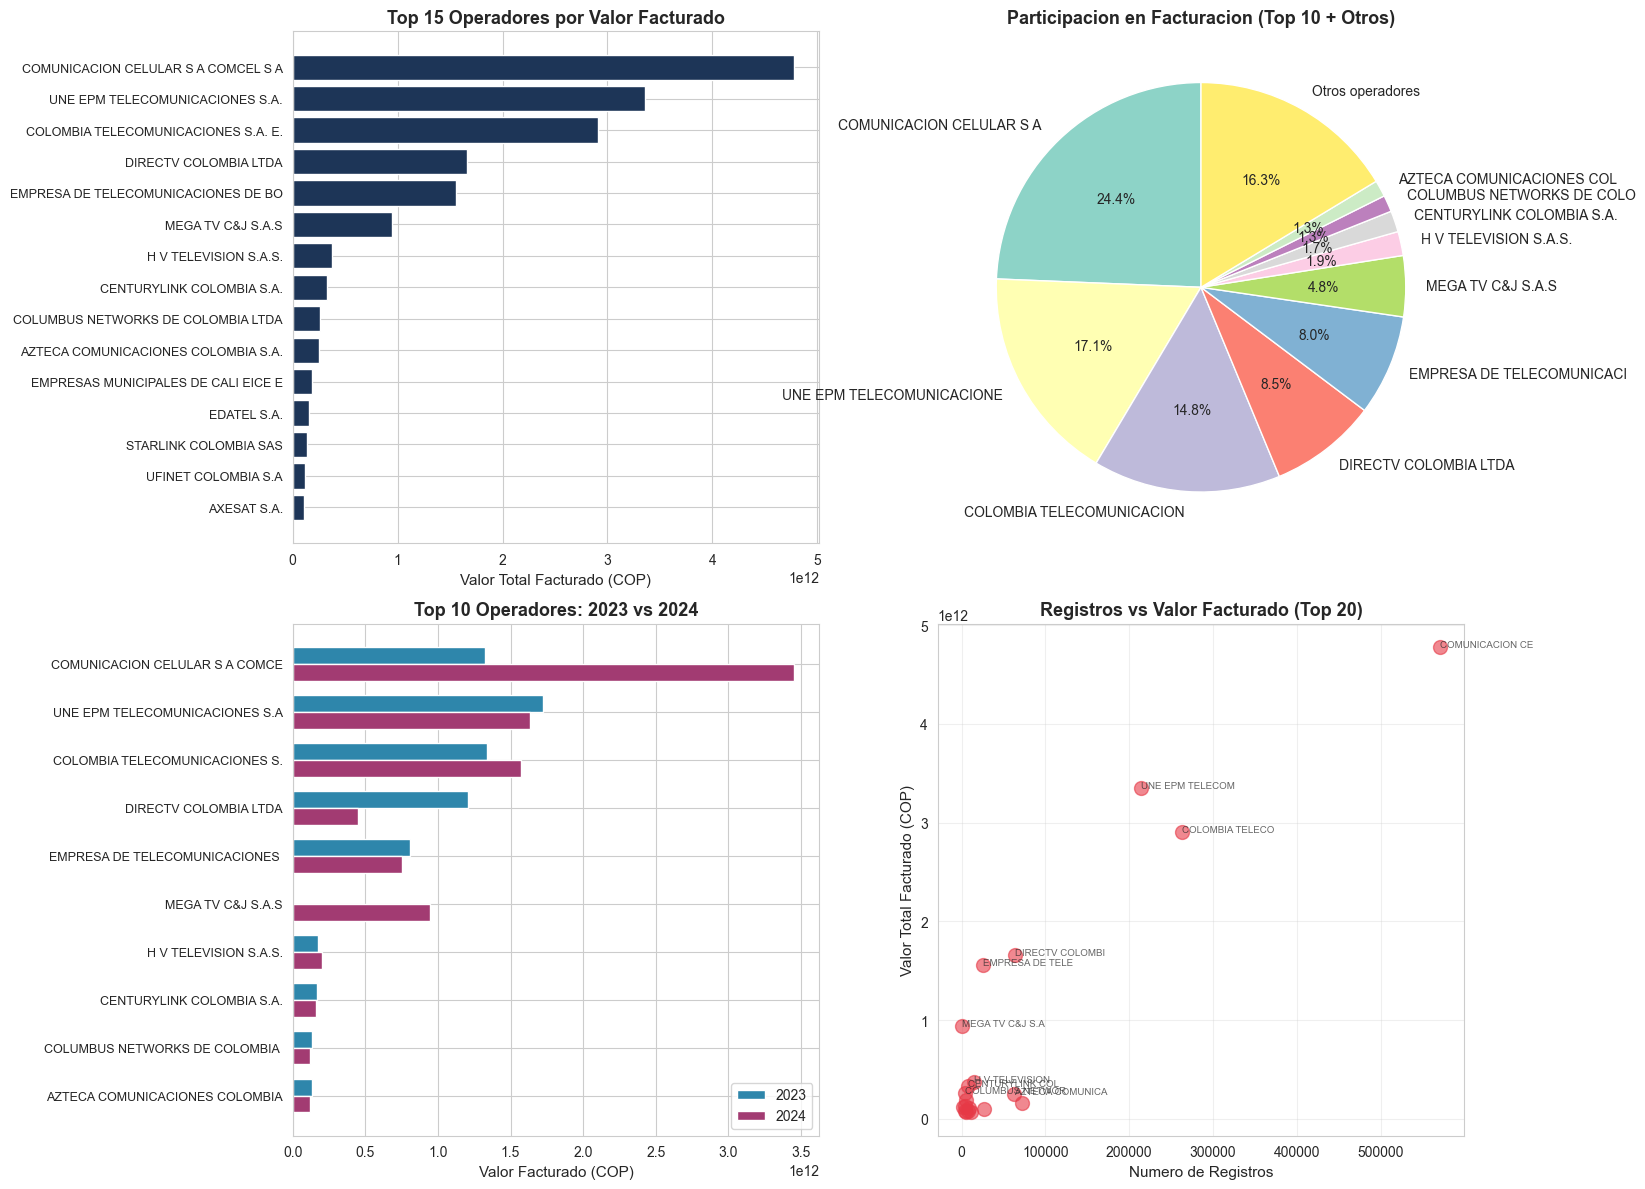

In [11]:
print("\n3.2 Distribucion del valor facturado por operador:")
print("-" * 80)

# Top operadores por valor facturado
valor_por_operador = df.groupby('EMPRESA').agg({
    'VALOR_FACTURADO_O_COBRADO': ['sum', 'mean', 'count']
}).round(0)
valor_por_operador.columns = ['Total', 'Media', 'Registros']
valor_por_operador = valor_por_operador.sort_values('Total', ascending=False)

print("\nTop 15 operadores por valor facturado:")
for i, (empresa, row) in enumerate(valor_por_operador.head(15).iterrows(), 1):
    pct = (row['Total'] / total_facturado) * 100
    print(f"  {i:2d}. {empresa[:45]:45s}: ${row['Total']:>15,.0f} ({pct:>5.2f}%)")

# Concentracion de mercado
top_5_valor = valor_por_operador.head(5)['Total'].sum()
top_10_valor = valor_por_operador.head(10)['Total'].sum()
concentracion_top5 = (top_5_valor / total_facturado) * 100
concentracion_top10 = (top_10_valor / total_facturado) * 100

print(f"\nConcentracion de mercado:")
print(f"  Top 5 operadores: {concentracion_top5:.2f}% del valor total")
print(f"  Top 10 operadores: {concentracion_top10:.2f}% del valor total")

# Visualizacion
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 15 operadores
ax1 = axes[0, 0]
top_15_ops = valor_por_operador.head(15)
ax1.barh(range(len(top_15_ops)), top_15_ops['Total'], color='#1D3557')
ax1.set_yticks(range(len(top_15_ops)))
ax1.set_yticklabels([e[:35] for e in top_15_ops.index], fontsize=9)
ax1.set_xlabel('Valor Total Facturado (COP)', fontsize=11)
ax1.set_title('Top 15 Operadores por Valor Facturado', fontsize=13, fontweight='bold')
ax1.invert_yaxis()

# Participacion Top 10
ax2 = axes[0, 1]
top_10_ops = valor_por_operador.head(10)
otros_valor = total_facturado - top_10_valor
participacion_ops = list(top_10_ops['Total'].values) + [otros_valor]
labels_ops = list(top_10_ops.index[:10]) + ['Otros operadores']
labels_ops = [l[:25] for l in labels_ops]
colors = plt.cm.Set3(np.linspace(0, 1, 11))
ax2.pie(participacion_ops, labels=labels_ops, autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Participacion en Facturacion (Top 10 + Otros)', fontsize=13, fontweight='bold')

# Comparacion 2023 vs 2024 - Top 10
ax3 = axes[1, 0]
top_10_empresas = valor_por_operador.head(10).index
df_top_10_ops = df[df['EMPRESA'].isin(top_10_empresas)]
valor_ops_ano = df_top_10_ops.groupby(['EMPRESA', 'ANNO'])['VALOR_FACTURADO_O_COBRADO'].sum().reset_index()
pivot_ops = valor_ops_ano.pivot(index='EMPRESA', columns='ANNO', values='VALOR_FACTURADO_O_COBRADO').fillna(0)
pivot_ops = pivot_ops.reindex(top_10_empresas)
x = np.arange(len(pivot_ops))
width = 0.35
ax3.barh(x - width/2, pivot_ops[2023], width, label='2023', color='#2E86AB')
ax3.barh(x + width/2, pivot_ops[2024], width, label='2024', color='#A23B72')
ax3.set_yticks(x)
ax3.set_yticklabels([e[:30] for e in pivot_ops.index], fontsize=9)
ax3.set_xlabel('Valor Facturado (COP)', fontsize=11)
ax3.set_title('Top 10 Operadores: 2023 vs 2024', fontsize=13, fontweight='bold')
ax3.legend()
ax3.invert_yaxis()

# Numero de registros vs Valor total (Top 20)
ax4 = axes[1, 1]
top_20_scatter = valor_por_operador.head(20)
ax4.scatter(top_20_scatter['Registros'], top_20_scatter['Total'], s=100, alpha=0.6, color='#E63946')
for i, empresa in enumerate(top_20_scatter.index):
    if i < 10:  # Etiquetar solo top 10 para claridad
        ax4.annotate(empresa[:15], (top_20_scatter.loc[empresa, 'Registros'], 
                    top_20_scatter.loc[empresa, 'Total']), fontsize=7, alpha=0.7)
ax4.set_xlabel('Numero de Registros', fontsize=11)
ax4.set_ylabel('Valor Total Facturado (COP)', fontsize=11)
ax4.set_title('Registros vs Valor Facturado (Top 20)', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.4 Evolucion trimestral del valor facturado


3.4 Evolucion trimestral del valor facturado:
--------------------------------------------------------------------------------

Valor facturado por trimestre:
  2023.0-T1.0: $1,928,361,668,346 | Lineas: 11,496,678 | Valor/linea: $   167,732
  2023.0-T2.0: $1,959,699,918,494 | Lineas: 11,572,474 | Valor/linea: $   169,341
  2023.0-T3.0: $2,002,943,898,132 | Lineas: 11,454,330 | Valor/linea: $   174,863
  2023.0-T4.0: $2,563,573,118,181 | Lineas: 11,150,659 | Valor/linea: $   229,903
  2024.0-T1.0: $2,412,956,494,885 | Lineas: 11,069,729 | Valor/linea: $   217,978
  2024.0-T2.0: $3,137,226,323,967 | Lineas: 10,951,828 | Valor/linea: $   286,457
  2024.0-T3.0: $3,097,304,828,994 | Lineas: 11,060,548 | Valor/linea: $   280,032
  2024.0-T4.0: $2,521,873,309,258 | Lineas: 10,899,479 | Valor/linea: $   231,376

Crecimiento trimestral (respecto al trimestre anterior):
  2023.0-T2.0: +1.63% ($+31,338,250,148)
  2023.0-T3.0: +2.21% ($+43,243,979,638)
  2023.0-T4.0: +27.99% ($+560,629,220,049)
 

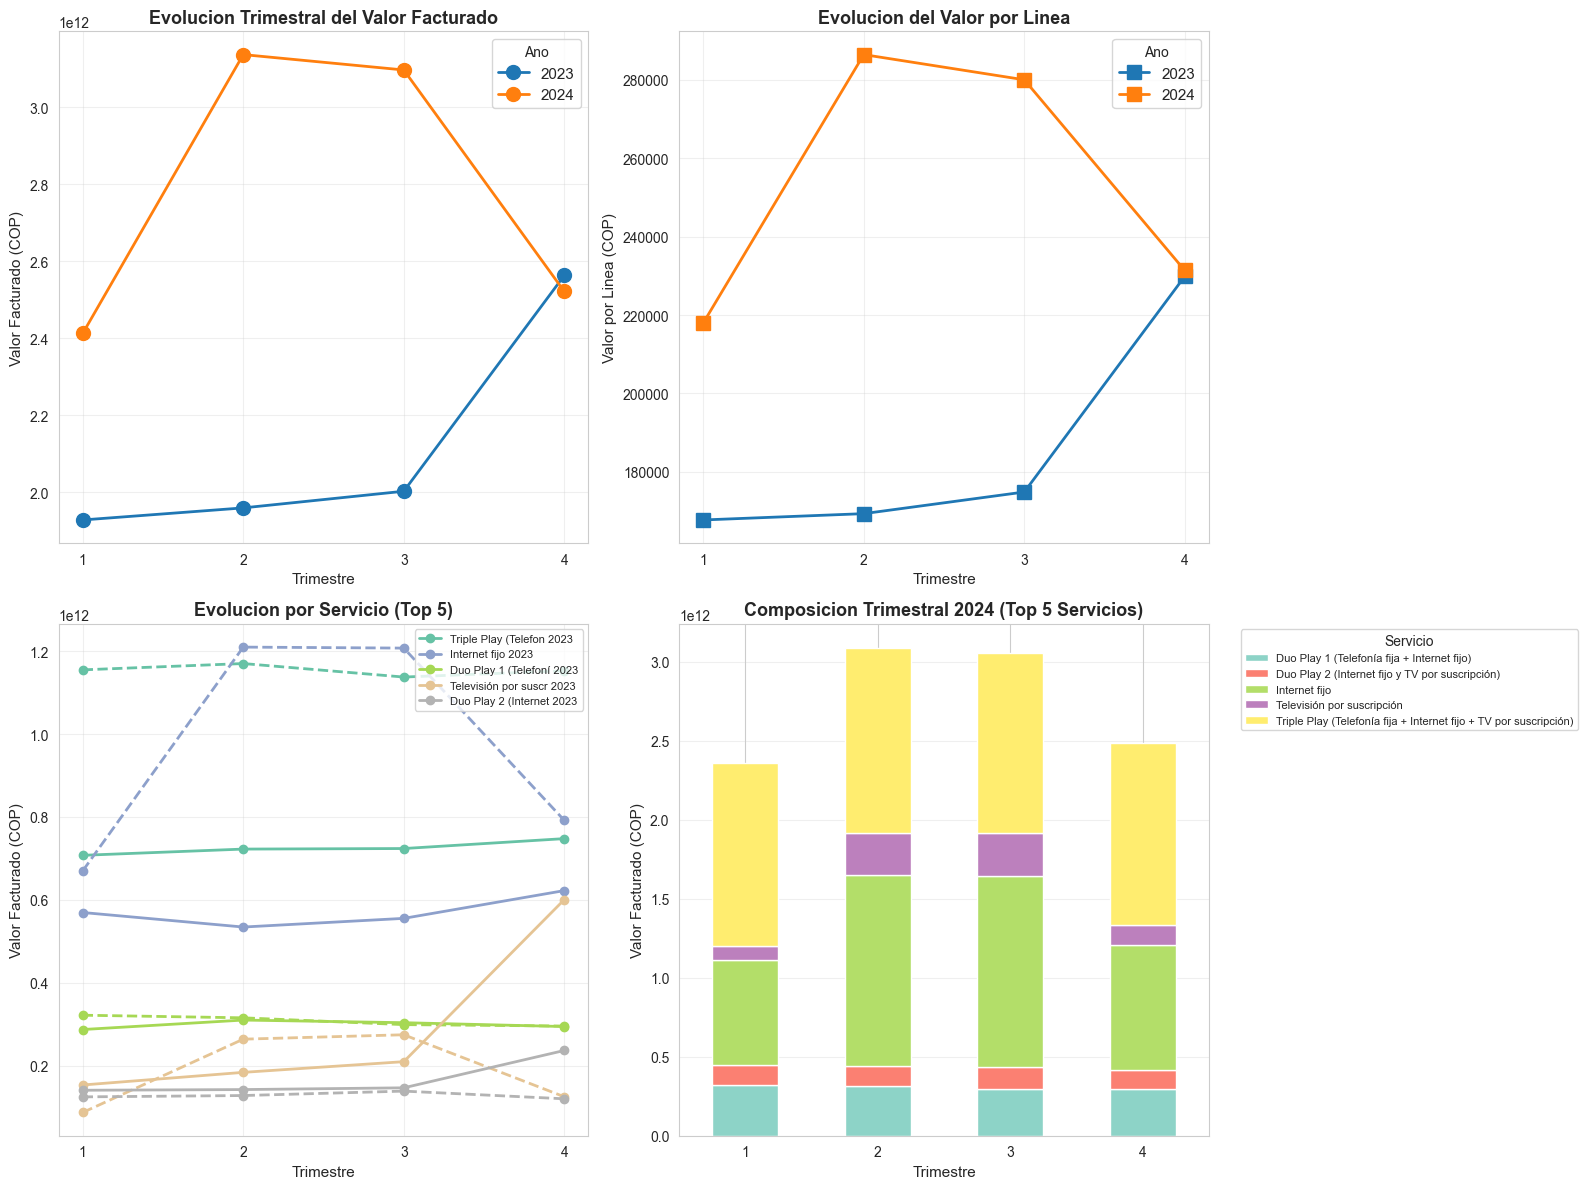

In [12]:
print("\n3.4 Evolucion trimestral del valor facturado:")
print("-" * 80)

# Valor por trimestre
valor_trimestral = df.groupby(['ANNO', 'TRIMESTRE']).agg({
    'VALOR_FACTURADO_O_COBRADO': 'sum',
    'CANTIDAD_LINEAS_ACCESOS': 'sum'
}).reset_index()
valor_trimestral['Valor_por_linea'] = (
    valor_trimestral['VALOR_FACTURADO_O_COBRADO'] / valor_trimestral['CANTIDAD_LINEAS_ACCESOS']
).round(0)

print("\nValor facturado por trimestre:")
for _, row in valor_trimestral.iterrows():
    print(f"  {row['ANNO']}-T{row['TRIMESTRE']}: ${row['VALOR_FACTURADO_O_COBRADO']:>15,.0f} | " +
          f"Lineas: {row['CANTIDAD_LINEAS_ACCESOS']:>10,.0f} | Valor/linea: ${row['Valor_por_linea']:>10,.0f}")

# Crecimiento trimestral
print("\nCrecimiento trimestral (respecto al trimestre anterior):")
for i in range(1, len(valor_trimestral)):
    row_actual = valor_trimestral.iloc[i]
    row_anterior = valor_trimestral.iloc[i-1]
    crecimiento = row_actual['VALOR_FACTURADO_O_COBRADO'] - row_anterior['VALOR_FACTURADO_O_COBRADO']
    crecimiento_pct = (crecimiento / row_anterior['VALOR_FACTURADO_O_COBRADO'] * 100) if row_anterior['VALOR_FACTURADO_O_COBRADO'] > 0 else 0
    print(f"  {row_actual['ANNO']}-T{row_actual['TRIMESTRE']}: {crecimiento_pct:+.2f}% (${crecimiento:+,.0f})")

# Visualizacion
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Evolucion trimestral del valor
ax1 = axes[0, 0]
for ano in [2023, 2024]:
    data = valor_trimestral[valor_trimestral['ANNO'] == ano]
    ax1.plot(data['TRIMESTRE'], data['VALOR_FACTURADO_O_COBRADO'], marker='o', 
            linewidth=2, markersize=10, label=str(ano))
ax1.set_xlabel('Trimestre', fontsize=11)
ax1.set_ylabel('Valor Facturado (COP)', fontsize=11)
ax1.set_title('Evolucion Trimestral del Valor Facturado', fontsize=13, fontweight='bold')
ax1.set_xticks([1, 2, 3, 4])
ax1.legend(title='Ano', fontsize=11)
ax1.grid(True, alpha=0.3)

# Evolucion del valor por linea
ax2 = axes[0, 1]
for ano in [2023, 2024]:
    data = valor_trimestral[valor_trimestral['ANNO'] == ano]
    ax2.plot(data['TRIMESTRE'], data['Valor_por_linea'], marker='s', 
            linewidth=2, markersize=10, label=str(ano))
ax2.set_xlabel('Trimestre', fontsize=11)
ax2.set_ylabel('Valor por Linea (COP)', fontsize=11)
ax2.set_title('Evolucion del Valor por Linea', fontsize=13, fontweight='bold')
ax2.set_xticks([1, 2, 3, 4])
ax2.legend(title='Ano', fontsize=11)
ax2.grid(True, alpha=0.3)

# Valor por servicio - evolucion trimestral (top 5)
ax3 = axes[1, 0]
top_5_servicios_valor = df.groupby('SERVICIO_PAQUETE')['VALOR_FACTURADO_O_COBRADO'].sum().sort_values(ascending=False).head(5).index
df_top_5_serv = df[df['SERVICIO_PAQUETE'].isin(top_5_servicios_valor)]
valor_serv_trim = df_top_5_serv.groupby(['ANNO', 'TRIMESTRE', 'SERVICIO_PAQUETE'])['VALOR_FACTURADO_O_COBRADO'].sum().reset_index()
colors_serv = plt.cm.Set2(np.linspace(0, 1, 5))
for i, servicio in enumerate(top_5_servicios_valor):
    for ano in [2023, 2024]:
        data = valor_serv_trim[(valor_serv_trim['SERVICIO_PAQUETE'] == servicio) & (valor_serv_trim['ANNO'] == ano)]
        if not data.empty:
            label = f'{servicio[:20]} {ano}' if ano == 2023 else None
            linestyle = '-' if ano == 2023 else '--'
            ax3.plot(data['TRIMESTRE'], data['VALOR_FACTURADO_O_COBRADO'], marker='o', 
                    linewidth=2, label=label, color=colors_serv[i], linestyle=linestyle, markersize=6)
ax3.set_xlabel('Trimestre', fontsize=11)
ax3.set_ylabel('Valor Facturado (COP)', fontsize=11)
ax3.set_title('Evolucion por Servicio (Top 5)', fontsize=13, fontweight='bold')
ax3.set_xticks([1, 2, 3, 4])
ax3.legend(loc='best', fontsize=8, ncol=1)
ax3.grid(True, alpha=0.3)

# Barras apiladas por trimestre
ax4 = axes[1, 1]
valor_trim_pivot = valor_serv_trim[valor_serv_trim['ANNO'] == 2024].pivot(
    index='TRIMESTRE', columns='SERVICIO_PAQUETE', values='VALOR_FACTURADO_O_COBRADO'
).fillna(0)
valor_trim_pivot.plot(kind='bar', stacked=True, ax=ax4, colormap='Set3')
ax4.set_xlabel('Trimestre', fontsize=11)
ax4.set_ylabel('Valor Facturado (COP)', fontsize=11)
ax4.set_title('Composicion Trimestral 2024 (Top 5 Servicios)', fontsize=13, fontweight='bold')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)
ax4.legend(title='Servicio', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 4. ANALISIS DE CANTIDAD DE LINEAS

### 4.1 Distribucion por segmento


4. ANALISIS DE CANTIDAD DE LINEAS

4.1 Distribucion por segmento:
--------------------------------------------------------------------------------

Lineas por segmento:
  Residencial - Estrato 2                      :   29,885,074 (33.33%) | Valor/linea: $   198,078
  Residencial - Estrato 3                      :   22,652,054 (25.27%) | Valor/linea: $   201,238
  Residencial - Estrato 1                      :   10,776,807 (12.02%) | Valor/linea: $   142,520
  Corporativo                                  :    9,734,497 (10.86%) | Valor/linea: $   395,325
  Residencial - Estrato 4                      :    7,884,516 ( 8.79%) | Valor/linea: $   213,861
  Sin estratificar                             :    3,414,377 ( 3.81%) | Valor/linea: $   276,282
  Residencial - Estrato 5                      :    2,624,163 ( 2.93%) | Valor/linea: $   242,660
  Residencial - Estrato 6                      :    1,957,593 ( 2.18%) | Valor/linea: $   251,404
  Corporativo  (accesos adicionales)          

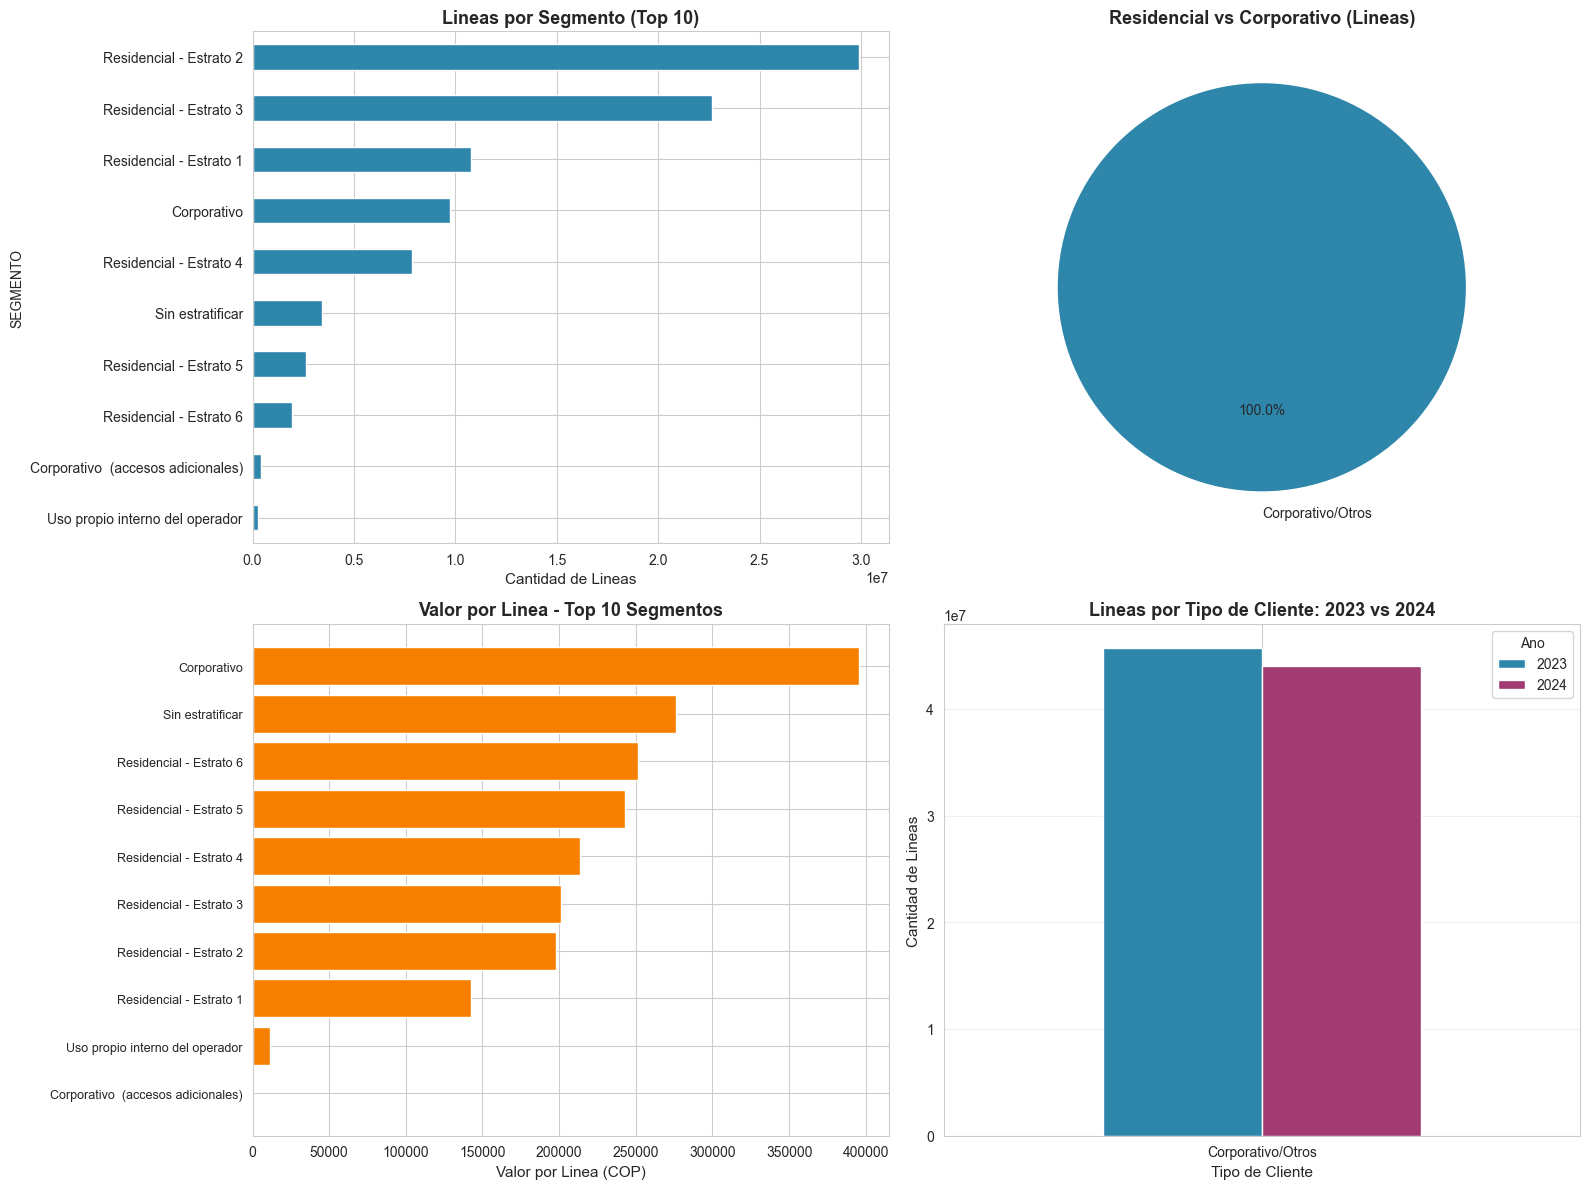

In [13]:
print("\n" + "="*80)
print("4. ANALISIS DE CANTIDAD DE LINEAS")
print("="*80)

print("\n4.1 Distribucion por segmento:")
print("-" * 80)

# Lineas por segmento
lineas_por_segmento = df.groupby('SEGMENTO').agg({
    'CANTIDAD_LINEAS_ACCESOS': 'sum',
    'VALOR_FACTURADO_O_COBRADO': 'sum'
}).round(0)
lineas_por_segmento['Valor_por_linea'] = (
    lineas_por_segmento['VALOR_FACTURADO_O_COBRADO'] / lineas_por_segmento['CANTIDAD_LINEAS_ACCESOS']
).round(0)
lineas_por_segmento = lineas_por_segmento.sort_values('CANTIDAD_LINEAS_ACCESOS', ascending=False)
lineas_por_segmento.columns = ['Lineas', 'Valor_total', 'Valor_por_linea']

total_lineas = df['CANTIDAD_LINEAS_ACCESOS'].sum()

print("\nLineas por segmento:")
for segmento, row in lineas_por_segmento.iterrows():
    pct = (row['Lineas'] / total_lineas) * 100
    print(f"  {segmento:45s}: {row['Lineas']:>12,.0f} ({pct:>5.2f}%) | Valor/linea: ${row['Valor_por_linea']:>10,.0f}")

# Clasificar en Residencial vs Corporativo
print("\n\nClasificacion Residencial vs Corporativo:")
residencial_segmentos = ['Residencial Estrato 1', 'Residencial Estrato 2', 'Residencial Estrato 3',
                         'Residencial Estrato 4', 'Residencial Estrato 5', 'Residencial Estrato 6']
df['TIPO_CLIENTE'] = df['SEGMENTO'].apply(
    lambda x: 'Residencial' if x in residencial_segmentos else 'Corporativo/Otros'
)

tipo_cliente_lineas = df.groupby('TIPO_CLIENTE').agg({
    'CANTIDAD_LINEAS_ACCESOS': 'sum',
    'VALOR_FACTURADO_O_COBRADO': 'sum'
})
tipo_cliente_lineas['Valor_por_linea'] = (
    tipo_cliente_lineas['VALOR_FACTURADO_O_COBRADO'] / tipo_cliente_lineas['CANTIDAD_LINEAS_ACCESOS']
).round(0)

for tipo, row in tipo_cliente_lineas.iterrows():
    pct_lineas = (row['CANTIDAD_LINEAS_ACCESOS'] / total_lineas) * 100
    pct_valor = (row['VALOR_FACTURADO_O_COBRADO'] / total_facturado) * 100
    print(f"\n  {tipo}:")
    print(f"    Lineas: {row['CANTIDAD_LINEAS_ACCESOS']:>12,.0f} ({pct_lineas:>5.2f}%)")
    print(f"    Valor: ${row['VALOR_FACTURADO_O_COBRADO']:>15,.0f} ({pct_valor:>5.2f}%)")
    print(f"    Valor/linea: ${row['Valor_por_linea']:>10,.0f}")

# Visualizacion
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribucion por segmento
ax1 = axes[0, 0]
lineas_por_segmento.head(10)['Lineas'].plot(kind='barh', ax=ax1, color='#2E86AB')
ax1.set_xlabel('Cantidad de Lineas', fontsize=11)
ax1.set_title('Lineas por Segmento (Top 10)', fontsize=13, fontweight='bold')
ax1.invert_yaxis()

# Pie chart Residencial vs Corporativo
ax2 = axes[0, 1]
tipo_cliente_lineas['CANTIDAD_LINEAS_ACCESOS'].plot(kind='pie', ax=ax2, autopct='%1.1f%%',
                                                      colors=['#2E86AB', '#A23B72'], startangle=90)
ax2.set_ylabel('')
ax2.set_title('Residencial vs Corporativo (Lineas)', fontsize=13, fontweight='bold')

# Valor por linea por segmento
ax3 = axes[1, 0]
top_10_valor_linea_seg = lineas_por_segmento.head(10).sort_values('Valor_por_linea')
ax3.barh(range(len(top_10_valor_linea_seg)), top_10_valor_linea_seg['Valor_por_linea'], color='#F77F00')
ax3.set_yticks(range(len(top_10_valor_linea_seg)))
ax3.set_yticklabels([s[:35] for s in top_10_valor_linea_seg.index], fontsize=9)
ax3.set_xlabel('Valor por Linea (COP)', fontsize=11)
ax3.set_title('Valor por Linea - Top 10 Segmentos', fontsize=13, fontweight='bold')

# Comparacion 2023 vs 2024 por tipo de cliente
ax4 = axes[1, 1]
lineas_tipo_ano = df.groupby(['ANNO', 'TIPO_CLIENTE'])['CANTIDAD_LINEAS_ACCESOS'].sum().reset_index()
pivot_tipo_ano = lineas_tipo_ano.pivot(index='TIPO_CLIENTE', columns='ANNO', values='CANTIDAD_LINEAS_ACCESOS')
pivot_tipo_ano.plot(kind='bar', ax=ax4, color=['#2E86AB', '#A23B72'])
ax4.set_xlabel('Tipo de Cliente', fontsize=11)
ax4.set_ylabel('Cantidad de Lineas', fontsize=11)
ax4.set_title('Lineas por Tipo de Cliente: 2023 vs 2024', fontsize=13, fontweight='bold')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)
ax4.legend(title='Ano')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 4.2 Relacion entre cantidad de lineas y tipo de paquete


4.2 Relacion entre cantidad de lineas y tipo de paquete:
--------------------------------------------------------------------------------

Lineas por servicio/paquete:
  Triple Play (Telefonía fija + Internet fijo + TV por suscripción):   35,845,354 (39.98%) | Valor/linea: $   209,690
  Internet fijo                                     :   19,452,862 (21.70%) | Valor/linea: $   316,650
  Duo Play 1 (Telefonía fija + Internet fijo)       :   12,163,019 (13.57%) | Valor/linea: $   199,334
  Televisión por suscripción                        :    9,331,594 (10.41%) | Valor/linea: $   203,112
  Telefonía fija                                    :    7,863,694 ( 8.77%) | Valor/linea: $    52,438
  Duo Play 2 (Internet fijo y TV por suscripción)   :    4,592,195 ( 5.12%) | Valor/linea: $   255,762
  Duo Play 3 (Telefonía fija y TV por suscripción)  :      407,007 ( 0.45%) | Valor/linea: $   100,863


Individual vs Empaquetado:
  Empaquetado    :   53,007,575 (59.12%) | Valor/linea: $   210,46

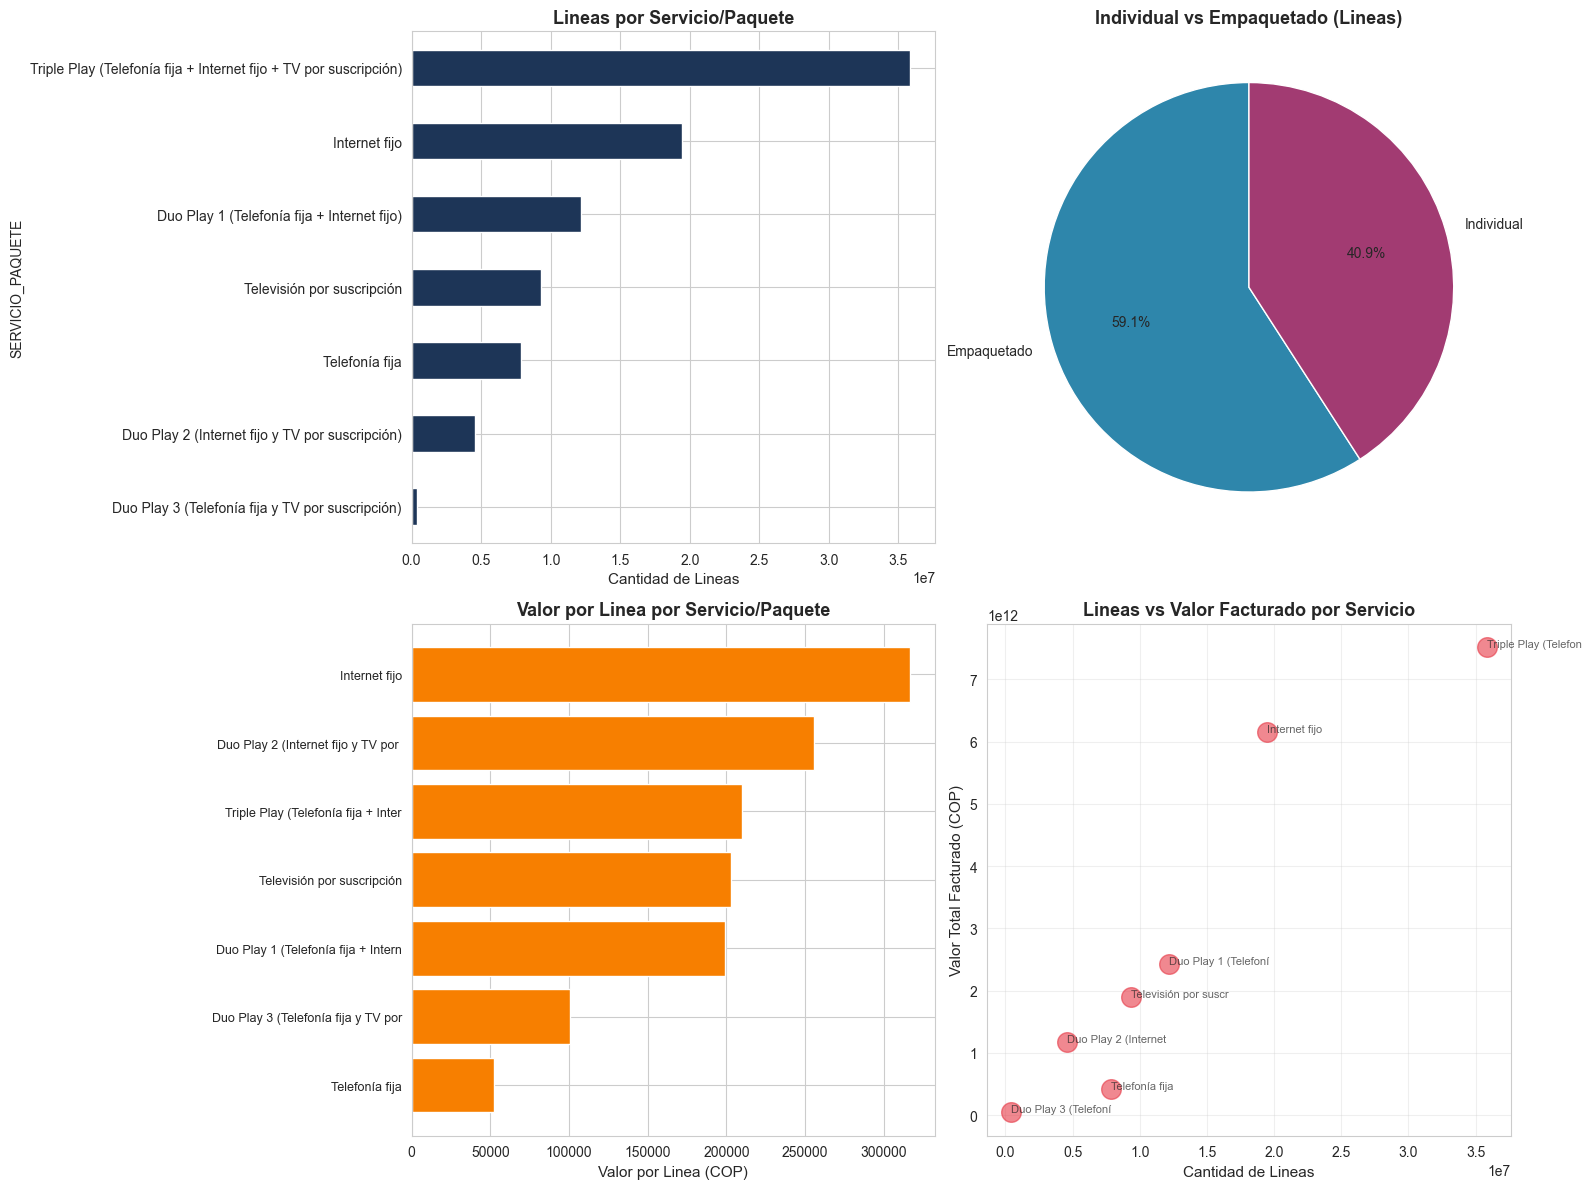

In [14]:
print("\n4.2 Relacion entre cantidad de lineas y tipo de paquete:")
print("-" * 80)

# Lineas por servicio/paquete
lineas_por_servicio = df.groupby('SERVICIO_PAQUETE').agg({
    'CANTIDAD_LINEAS_ACCESOS': 'sum',
    'VALOR_FACTURADO_O_COBRADO': 'sum'
}).round(0)
lineas_por_servicio['Valor_por_linea'] = (
    lineas_por_servicio['VALOR_FACTURADO_O_COBRADO'] / lineas_por_servicio['CANTIDAD_LINEAS_ACCESOS']
).round(0)
lineas_por_servicio = lineas_por_servicio.sort_values('CANTIDAD_LINEAS_ACCESOS', ascending=False)

print("\nLineas por servicio/paquete:")
for servicio, row in lineas_por_servicio.iterrows():
    pct = (row['CANTIDAD_LINEAS_ACCESOS'] / total_lineas) * 100
    print(f"  {servicio:50s}: {row['CANTIDAD_LINEAS_ACCESOS']:>12,.0f} ({pct:>5.2f}%) | Valor/linea: ${row['Valor_por_linea']:>10,.0f}")

# Individual vs Empaquetado
print("\n\nIndividual vs Empaquetado:")
lineas_tipo_serv = df.groupby('TIPO_SERVICIO').agg({
    'CANTIDAD_LINEAS_ACCESOS': 'sum',
    'VALOR_FACTURADO_O_COBRADO': 'sum'
})
lineas_tipo_serv['Valor_por_linea'] = (
    lineas_tipo_serv['VALOR_FACTURADO_O_COBRADO'] / lineas_tipo_serv['CANTIDAD_LINEAS_ACCESOS']
).round(0)

for tipo, row in lineas_tipo_serv.iterrows():
    pct = (row['CANTIDAD_LINEAS_ACCESOS'] / total_lineas) * 100
    print(f"  {tipo:15s}: {row['CANTIDAD_LINEAS_ACCESOS']:>12,.0f} ({pct:>5.2f}%) | Valor/linea: ${row['Valor_por_linea']:>10,.0f}")

# Visualizacion
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Lineas por servicio
ax1 = axes[0, 0]
lineas_por_servicio['CANTIDAD_LINEAS_ACCESOS'].plot(kind='barh', ax=ax1, color='#1D3557')
ax1.set_xlabel('Cantidad de Lineas', fontsize=11)
ax1.set_title('Lineas por Servicio/Paquete', fontsize=13, fontweight='bold')
ax1.invert_yaxis()

# Pie chart Individual vs Empaquetado
ax2 = axes[0, 1]
lineas_tipo_serv['CANTIDAD_LINEAS_ACCESOS'].plot(kind='pie', ax=ax2, autopct='%1.1f%%',
                                                   colors=['#2E86AB', '#A23B72'], startangle=90)
ax2.set_ylabel('')
ax2.set_title('Individual vs Empaquetado (Lineas)', fontsize=13, fontweight='bold')

# Valor por linea por servicio
ax3 = axes[1, 0]
lineas_por_servicio_sorted = lineas_por_servicio.sort_values('Valor_por_linea')
ax3.barh(range(len(lineas_por_servicio_sorted)), lineas_por_servicio_sorted['Valor_por_linea'], color='#F77F00')
ax3.set_yticks(range(len(lineas_por_servicio_sorted)))
ax3.set_yticklabels([s[:35] for s in lineas_por_servicio_sorted.index], fontsize=9)
ax3.set_xlabel('Valor por Linea (COP)', fontsize=11)
ax3.set_title('Valor por Linea por Servicio/Paquete', fontsize=13, fontweight='bold')

# Scatter: Lineas vs Valor total por servicio
ax4 = axes[1, 1]
ax4.scatter(lineas_por_servicio['CANTIDAD_LINEAS_ACCESOS'], 
           lineas_por_servicio['VALOR_FACTURADO_O_COBRADO'], 
           s=200, alpha=0.6, color='#E63946')
for servicio in lineas_por_servicio.index:
    ax4.annotate(servicio[:20], 
                (lineas_por_servicio.loc[servicio, 'CANTIDAD_LINEAS_ACCESOS'],
                 lineas_por_servicio.loc[servicio, 'VALOR_FACTURADO_O_COBRADO']),
                fontsize=8, alpha=0.7)
ax4.set_xlabel('Cantidad de Lineas', fontsize=11)
ax4.set_ylabel('Valor Total Facturado (COP)', fontsize=11)
ax4.set_title('Lineas vs Valor Facturado por Servicio', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.3 Tendencias entre anos


4.3 Tendencias entre anos:
--------------------------------------------------------------------------------

Lineas por ano:
  2023:   45,674,141 lineas | Valor/linea: $   185,106
  2024:   43,981,584 lineas | Valor/linea: $   253,955

Variacion 2023-2024:
  Lineas: -1,692,557 (-3.71%)
  Valor por linea: $+68,849 (+37.19%)


Evolucion trimestral de lineas:
  2023-T1:   11,496,678 lineas
  2023-T2:   11,572,474 lineas
  2023-T3:   11,454,330 lineas
  2023-T4:   11,150,659 lineas
  2024-T1:   11,069,729 lineas
  2024-T2:   10,951,828 lineas
  2024-T3:   11,060,548 lineas
  2024-T4:   10,899,479 lineas


Variacion de lineas por segmento (2023-2024):
  Corporativo  (accesos adicionales)           :     +435,453 (  +inf%)
  Residencial - Estrato 1                      :       -3,591 ( -0.07%)
  Uso propio interno del operador              :       -6,299 ( -4.23%)
  Residencial - Estrato 5                      :      -28,763 ( -2.17%)
  Residencial - Estrato 6                      :      -4

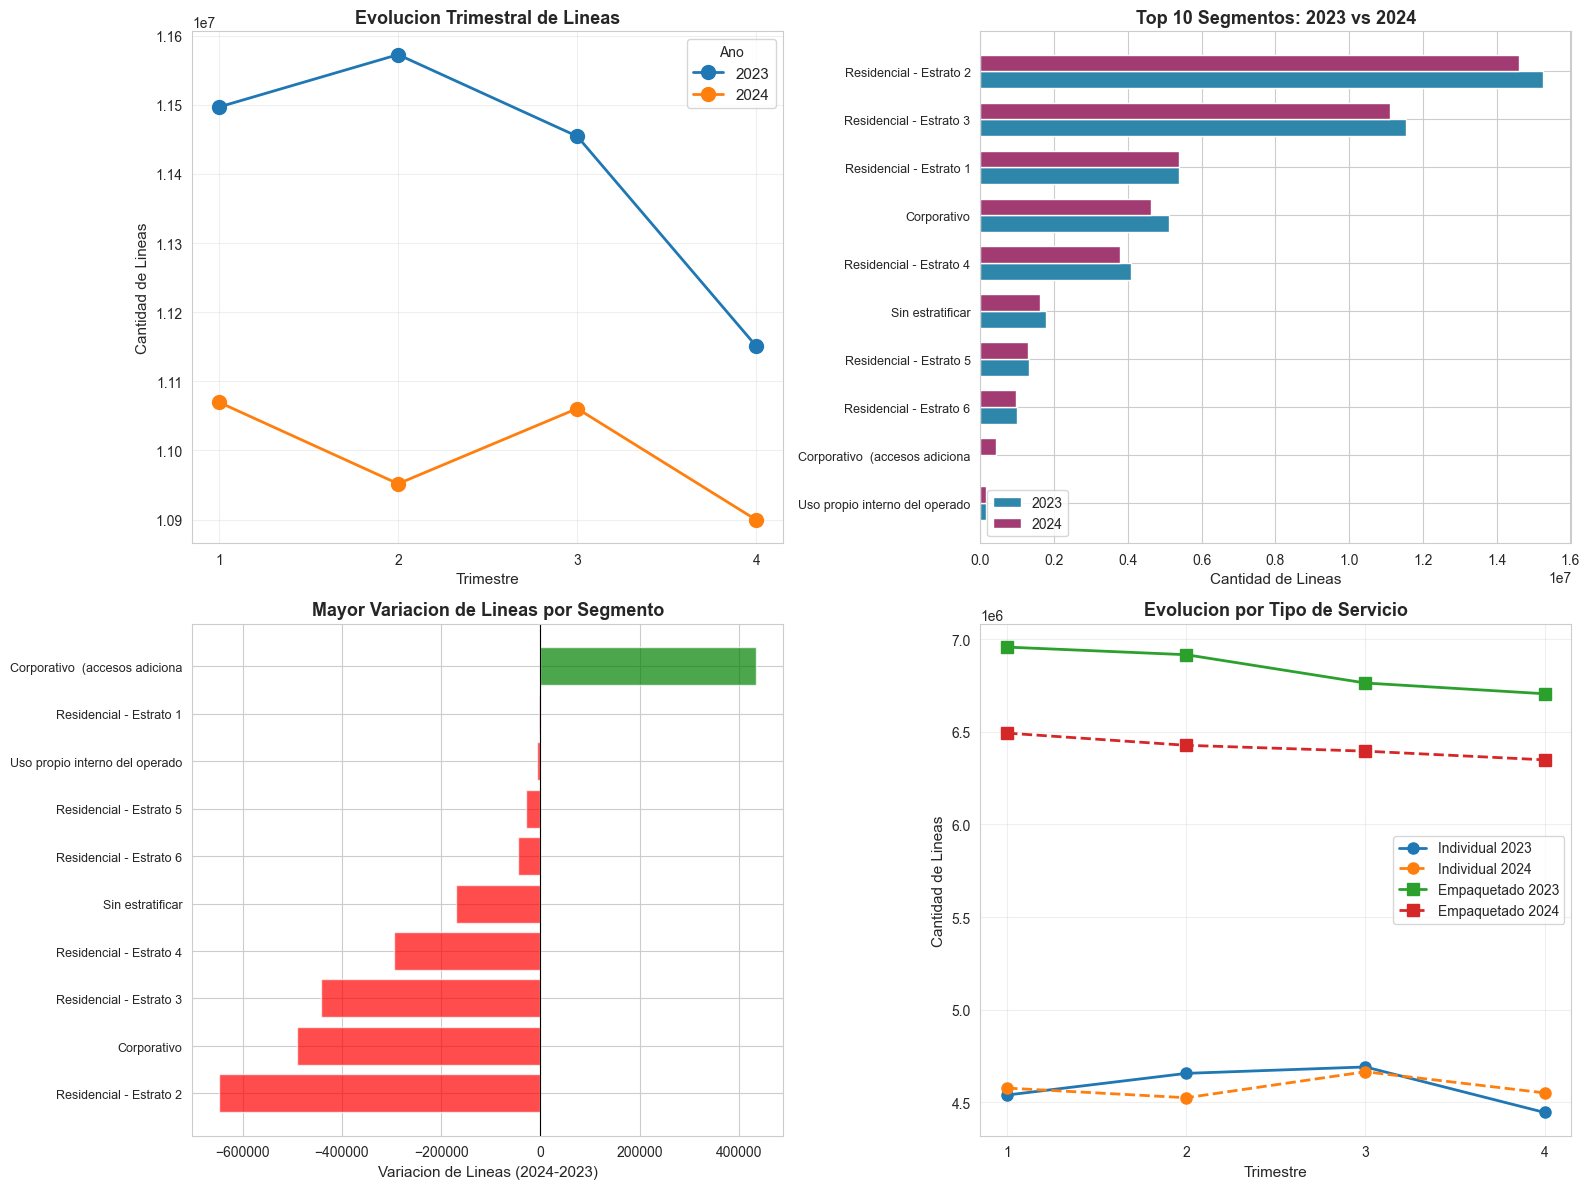

In [15]:
print("\n4.3 Tendencias entre anos:")
print("-" * 80)

# Lineas por ano
lineas_ano = df.groupby('ANNO').agg({
    'CANTIDAD_LINEAS_ACCESOS': 'sum',
    'VALOR_FACTURADO_O_COBRADO': 'sum'
}).round(0)
lineas_ano['Valor_por_linea'] = (
    lineas_ano['VALOR_FACTURADO_O_COBRADO'] / lineas_ano['CANTIDAD_LINEAS_ACCESOS']
).round(0)

print("\nLineas por ano:")
for ano, row in lineas_ano.iterrows():
    print(f"  {ano}: {row['CANTIDAD_LINEAS_ACCESOS']:>12,.0f} lineas | Valor/linea: ${row['Valor_por_linea']:>10,.0f}")

# Variacion
diff_lineas = lineas_ano.loc[2024, 'CANTIDAD_LINEAS_ACCESOS'] - lineas_ano.loc[2023, 'CANTIDAD_LINEAS_ACCESOS']
diff_lineas_pct = (diff_lineas / lineas_ano.loc[2023, 'CANTIDAD_LINEAS_ACCESOS'] * 100)
diff_valor_linea = lineas_ano.loc[2024, 'Valor_por_linea'] - lineas_ano.loc[2023, 'Valor_por_linea']
diff_valor_linea_pct = (diff_valor_linea / lineas_ano.loc[2023, 'Valor_por_linea'] * 100)

print(f"\nVariacion 2023-2024:")
print(f"  Lineas: {diff_lineas:+,.0f} ({diff_lineas_pct:+.2f}%)")
print(f"  Valor por linea: ${diff_valor_linea:+,.0f} ({diff_valor_linea_pct:+.2f}%)")

# Evolucion trimestral
print("\n\nEvolucion trimestral de lineas:")
lineas_trim = df.groupby(['ANNO', 'TRIMESTRE'])['CANTIDAD_LINEAS_ACCESOS'].sum().reset_index()
for _, row in lineas_trim.iterrows():
    print(f"  {row['ANNO']}-T{row['TRIMESTRE']}: {row['CANTIDAD_LINEAS_ACCESOS']:>12,.0f} lineas")

# Por segmento - comparacion anos
print("\n\nVariacion de lineas por segmento (2023-2024):")
lineas_seg_ano = df.groupby(['ANNO', 'SEGMENTO'])['CANTIDAD_LINEAS_ACCESOS'].sum().reset_index()
pivot_seg = lineas_seg_ano.pivot(index='SEGMENTO', columns='ANNO', values='CANTIDAD_LINEAS_ACCESOS').fillna(0)
pivot_seg['Variacion'] = pivot_seg[2024] - pivot_seg[2023]
pivot_seg['Var_pct'] = (pivot_seg['Variacion'] / pivot_seg[2023] * 100).round(2)
pivot_seg = pivot_seg.sort_values('Variacion', ascending=False)

for segmento in pivot_seg.head(10).index:
    row = pivot_seg.loc[segmento]
    print(f"  {segmento:45s}: {row['Variacion']:+12,.0f} ({row['Var_pct']:+6.2f}%)")

# Visualizacion
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Evolucion trimestral
ax1 = axes[0, 0]
for ano in [2023, 2024]:
    data = lineas_trim[lineas_trim['ANNO'] == ano]
    ax1.plot(data['TRIMESTRE'], data['CANTIDAD_LINEAS_ACCESOS'], marker='o', 
            linewidth=2, markersize=10, label=str(ano))
ax1.set_xlabel('Trimestre', fontsize=11)
ax1.set_ylabel('Cantidad de Lineas', fontsize=11)
ax1.set_title('Evolucion Trimestral de Lineas', fontsize=13, fontweight='bold')
ax1.set_xticks([1, 2, 3, 4])
ax1.legend(title='Ano', fontsize=11)
ax1.grid(True, alpha=0.3)

# Comparacion por segmento (Top 10)
ax2 = axes[0, 1]
top_10_seg = pivot_seg.head(10).sort_values(2024, ascending=True)
x = np.arange(len(top_10_seg))
width = 0.35
ax2.barh(x - width/2, top_10_seg[2023], width, label='2023', color='#2E86AB')
ax2.barh(x + width/2, top_10_seg[2024], width, label='2024', color='#A23B72')
ax2.set_yticks(x)
ax2.set_yticklabels([s[:30] for s in top_10_seg.index], fontsize=9)
ax2.set_xlabel('Cantidad de Lineas', fontsize=11)
ax2.set_title('Top 10 Segmentos: 2023 vs 2024', fontsize=13, fontweight='bold')
ax2.legend()

# Variacion absoluta por segmento
ax3 = axes[1, 0]
top_var = pivot_seg.sort_values('Variacion', ascending=False).head(10)
colors_var = ['green' if x > 0 else 'red' for x in top_var['Variacion']]
ax3.barh(range(len(top_var)), top_var['Variacion'], color=colors_var, alpha=0.7)
ax3.set_yticks(range(len(top_var)))
ax3.set_yticklabels([s[:30] for s in top_var.index], fontsize=9)
ax3.set_xlabel('Variacion de Lineas (2024-2023)', fontsize=11)
ax3.set_title('Mayor Variacion de Lineas por Segmento', fontsize=13, fontweight='bold')
ax3.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax3.invert_yaxis()

# Evolucion por tipo de servicio
ax4 = axes[1, 1]
lineas_tipo_trim = df.groupby(['ANNO', 'TRIMESTRE', 'TIPO_SERVICIO'])['CANTIDAD_LINEAS_ACCESOS'].sum().reset_index()
for tipo in ['Individual', 'Empaquetado']:
    for ano in [2023, 2024]:
        data = lineas_tipo_trim[(lineas_tipo_trim['TIPO_SERVICIO'] == tipo) & (lineas_tipo_trim['ANNO'] == ano)]
        label = f'{tipo} {ano}'
        marker = 'o' if tipo == 'Individual' else 's'
        linestyle = '-' if ano == 2023 else '--'
        ax4.plot(data['TRIMESTRE'], data['CANTIDAD_LINEAS_ACCESOS'], marker=marker, 
                linewidth=2, label=label, markersize=8, linestyle=linestyle)
ax4.set_xlabel('Trimestre', fontsize=11)
ax4.set_ylabel('Cantidad de Lineas', fontsize=11)
ax4.set_title('Evolucion por Tipo de Servicio', fontsize=13, fontweight='bold')
ax4.set_xticks([1, 2, 3, 4])
ax4.legend(loc='best', fontsize=10)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()







## 5. IDENTIFICACION DE PATRONES Y ANOMALIAS

### 5.1 Municipios con crecimiento inusual


5. IDENTIFICACION DE PATRONES Y ANOMALIAS

5.1 Municipios con crecimiento inusualmente alto o bajo:
--------------------------------------------------------------------------------

Top 10 municipios con mayor crecimiento:
  YALÍ                      (ANTIOQUIA           ):    3,111 ->    9,688 (+211.41%)
  CARMEN DE APICALÁ         (TOLIMA              ):    3,324 ->    8,849 (+166.22%)
  ISNOS                     (HUILA               ):    4,944 ->   12,998 (+162.90%)
  ARATOCA                   (SANTANDER           ):    3,148 ->    5,961 ( +89.36%)
  LEJANÍAS                  (META                ):    3,364 ->    6,202 ( +84.36%)
  AMALFI                    (ANTIOQUIA           ):    9,422 ->   16,304 ( +73.04%)
  CHIPAQUE                  (CUNDINAMARCA        ):    3,343 ->    5,657 ( +69.22%)
  VIJES                     (VALLE DEL CAUCA     ):    3,817 ->    6,350 ( +66.36%)
  MONIQUIRÁ                 (BOYACÁ              ):    4,814 ->    7,948 ( +65.10%)
  LA UNIÓN          

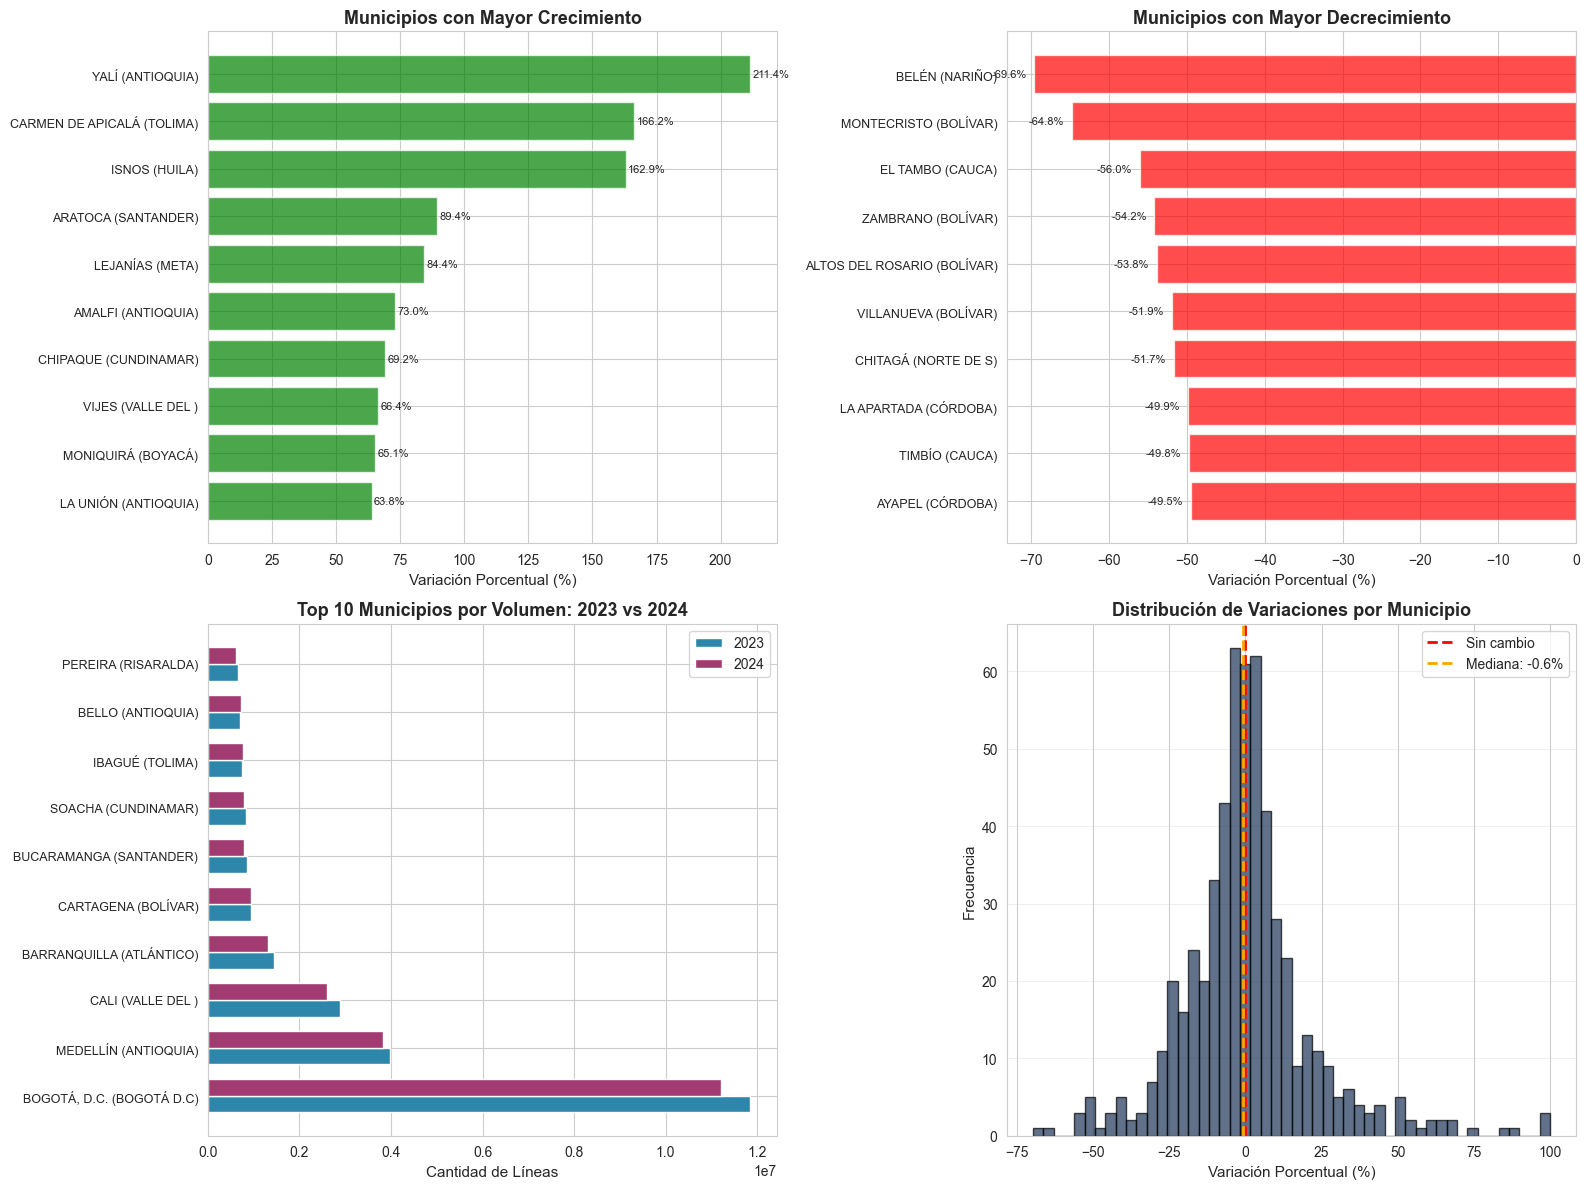

In [16]:
print("\n" + "="*80)
print("5. IDENTIFICACION DE PATRONES Y ANOMALIAS")
print("="*80)

print("\n5.1 Municipios con crecimiento inusualmente alto o bajo:")
print("-" * 80)

# Calcular crecimiento por municipio
lineas_mun_ano = df.groupby(['MUNICIPIO', 'DEPARTAMENTO', 'ANNO'])['CANTIDAD_LINEAS_ACCESOS'].sum().reset_index()
pivot_mun = lineas_mun_ano.pivot_table(
    index=['MUNICIPIO', 'DEPARTAMENTO'], columns='ANNO', values='CANTIDAD_LINEAS_ACCESOS', fill_value=0
)

# Solo municipios que reportaron en ambos años
pivot_mun = pivot_mun[(pivot_mun[2023] > 0) & (pivot_mun[2024] > 0)]
pivot_mun['Variacion'] = pivot_mun[2024] - pivot_mun[2023]
pivot_mun['Var_pct'] = (pivot_mun['Variacion'] / pivot_mun[2023] * 100).round(2)

# Filtrar municipios con volumen significativo (top 50%)
pivot_mun_filtrado = pivot_mun[pivot_mun[2023] >= pivot_mun[2023].quantile(0.5)]

# Mayor crecimiento
print("\nTop 10 municipios con mayor crecimiento:")
top_crecimiento = pivot_mun_filtrado.sort_values('Var_pct', ascending=False).head(10)
for (municipio, depto), row in top_crecimiento.iterrows():
    print(f"  {municipio:25s} ({depto:20s}): {row[2023]:>8,.0f} -> {row[2024]:>8,.0f} ({row['Var_pct']:+7.2f}%)")

# Mayor decrecimiento
print("\nTop 10 municipios con mayor decrecimiento:")
top_decrecimiento = pivot_mun_filtrado.sort_values('Var_pct', ascending=True).head(10)
for (municipio, depto), row in top_decrecimiento.iterrows():
    print(f"  {municipio:25s} ({depto:20s}): {row[2023]:>8,.0f} -> {row[2024]:>8,.0f} ({row['Var_pct']:+7.2f}%)")

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Mayor crecimiento
ax1 = axes[0, 0]
top_10_crec = top_crecimiento.sort_values('Var_pct')
municipios_labels = [f"{m} ({d[:10]})" for m, d in top_10_crec.index]
ax1.barh(range(len(top_10_crec)), top_10_crec['Var_pct'], color='green', alpha=0.7)
ax1.set_yticks(range(len(top_10_crec)))
ax1.set_yticklabels(municipios_labels, fontsize=9)
ax1.set_xlabel('Variación Porcentual (%)', fontsize=11)
ax1.set_title('Municipios con Mayor Crecimiento', fontsize=13, fontweight='bold')
for i, v in enumerate(top_10_crec['Var_pct']):
    ax1.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=8)

# Mayor decrecimiento
ax2 = axes[0, 1]
top_10_decrec = top_decrecimiento.sort_values('Var_pct', ascending=False)
municipios_labels_d = [f"{m} ({d[:10]})" for m, d in top_10_decrec.index]
ax2.barh(range(len(top_10_decrec)), top_10_decrec['Var_pct'], color='red', alpha=0.7)
ax2.set_yticks(range(len(top_10_decrec)))
ax2.set_yticklabels(municipios_labels_d, fontsize=9)
ax2.set_xlabel('Variación Porcentual (%)', fontsize=11)
ax2.set_title('Municipios con Mayor Decrecimiento', fontsize=13, fontweight='bold')
for i, v in enumerate(top_10_decrec['Var_pct']):
    ax2.text(v - 1, i, f'{v:.1f}%', va='center', ha='right', fontsize=8)

# Comparación absoluta - Top 10 por volumen
ax3 = axes[1, 0]
top_10_volumen = pivot_mun.sort_values(2024, ascending=False).head(10)
municipios_labels_vol = [f"{m[:15]} ({d[:10]})" for m, d in top_10_volumen.index]
x = np.arange(len(top_10_volumen))
width = 0.35
ax3.barh(x - width/2, top_10_volumen[2023], width, label='2023', color='#2E86AB')
ax3.barh(x + width/2, top_10_volumen[2024], width, label='2024', color='#A23B72')
ax3.set_yticks(x)
ax3.set_yticklabels(municipios_labels_vol, fontsize=9)
ax3.set_xlabel('Cantidad de Líneas', fontsize=11)
ax3.set_title('Top 10 Municipios por Volumen: 2023 vs 2024', fontsize=13, fontweight='bold')
ax3.legend()

# Distribución de variaciones
ax4 = axes[1, 1]
variaciones_filtradas = pivot_mun_filtrado['Var_pct'].clip(-100, 100)  # Limitar outliers extremos
ax4.hist(variaciones_filtradas, bins=50, color='#1D3557', alpha=0.7, edgecolor='black')
ax4.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Sin cambio')
ax4.axvline(x=variaciones_filtradas.median(), color='orange', linestyle='--', linewidth=2, 
            label=f'Mediana: {variaciones_filtradas.median():.1f}%')
ax4.set_xlabel('Variación Porcentual (%)', fontsize=11)
ax4.set_ylabel('Frecuencia', fontsize=11)
ax4.set_title('Distribución de Variaciones por Municipio', fontsize=13, fontweight='bold')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 5.2 Paquetes con valores facturados fuera de rangos normales


5.2 Paquetes con valores facturados fuera de rangos normales:
--------------------------------------------------------------------------------

Estadísticas de valor facturado por servicio/paquete:
--------------------------------------------------------------------------------

[1] Internet fijo
  Rango normal: $-4,593,146 - $8,535,241
  Outliers bajos: 0 (0.00%)
  Outliers altos: 95,780 (14.01%)
  Total outliers: 14.01%

[2] Telefonía fija
  Rango normal: $-2,335,382 - $4,110,031
  Outliers bajos: 0 (0.00%)
  Outliers altos: 4,036 (15.40%)
  Total outliers: 15.40%

[3] Televisión por suscripción
  Rango normal: $-7,975,411 - $14,151,053
  Outliers bajos: 0 (0.00%)
  Outliers altos: 15,150 (13.61%)
  Total outliers: 13.61%

[4] Duo Play 1 (Telefonía fija + Internet fijo)
  Rango normal: $-2,467,464 - $4,648,960
  Outliers bajos: 0 (0.00%)
  Outliers altos: 40,303 (14.53%)
  Total outliers: 14.53%

[5] Duo Play 2 (Internet fijo y TV por suscripción)
  Rango normal: $-2,968,579 - $5,59

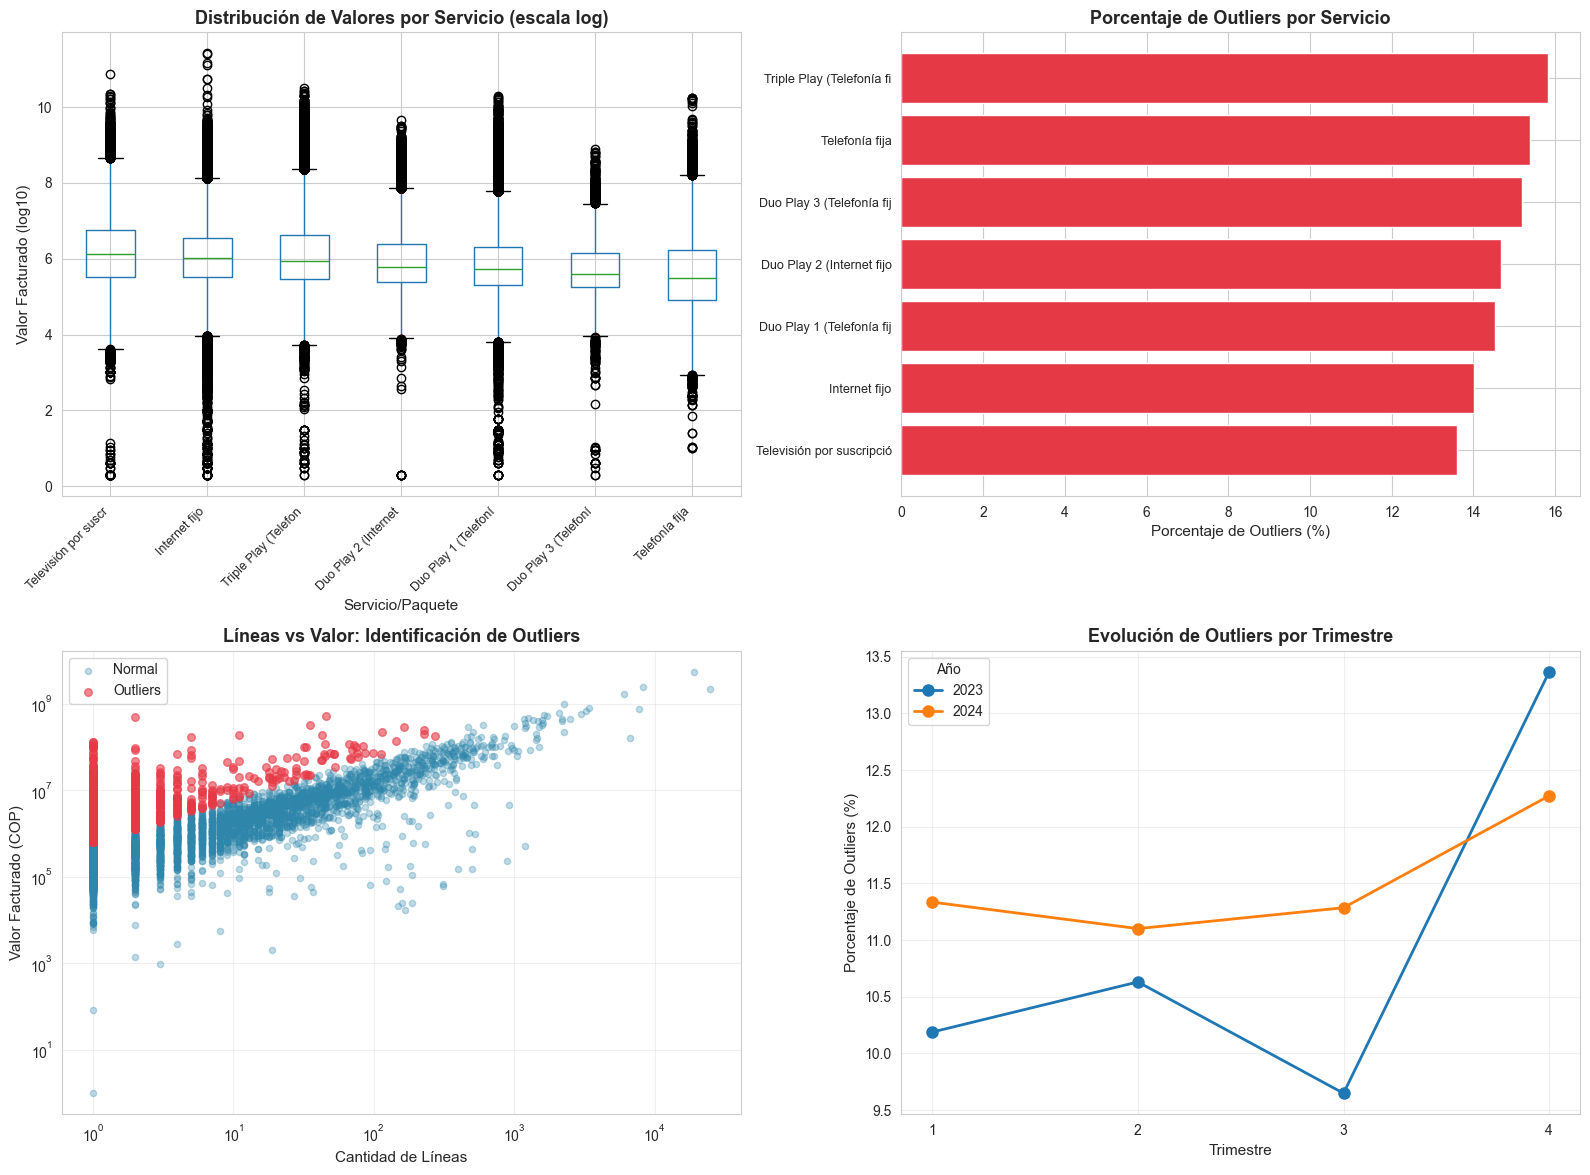

In [17]:
print("\n5.2 Paquetes con valores facturados fuera de rangos normales:")
print("-" * 80)

# Calcular estadísticas por servicio
print("\nEstadísticas de valor facturado por servicio/paquete:")
print("-" * 80)

for servicio in sorted(df['ID_SERVICIO_PAQUETE'].unique()):
    df_serv = df[(df['ID_SERVICIO_PAQUETE'] == servicio) & (df['VALOR_FACTURADO_O_COBRADO'] > 0)]
    
    if len(df_serv) > 0:
        nombre = df_serv['SERVICIO_PAQUETE'].iloc[0]
        
        Q1 = df_serv['VALOR_FACTURADO_O_COBRADO'].quantile(0.25)
        Q3 = df_serv['VALOR_FACTURADO_O_COBRADO'].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        outliers_bajos = df_serv[df_serv['VALOR_FACTURADO_O_COBRADO'] < limite_inferior]
        outliers_altos = df_serv[df_serv['VALOR_FACTURADO_O_COBRADO'] > limite_superior]
        
        pct_outliers = (len(outliers_bajos) + len(outliers_altos)) / len(df_serv) * 100
        
        print(f"\n[{servicio}] {nombre}")
        print(f"  Rango normal: ${limite_inferior:,.0f} - ${limite_superior:,.0f}")
        print(f"  Outliers bajos: {len(outliers_bajos):,} ({len(outliers_bajos)/len(df_serv)*100:.2f}%)")
        print(f"  Outliers altos: {len(outliers_altos):,} ({len(outliers_altos)/len(df_serv)*100:.2f}%)")
        print(f"  Total outliers: {pct_outliers:.2f}%")

# Identificar registros con valores extremos
print("\n\nTop 10 registros con mayor valor facturado:")
top_valores = df.nlargest(10, 'VALOR_FACTURADO_O_COBRADO')[
    ['EMPRESA', 'DEPARTAMENTO', 'MUNICIPIO', 'SERVICIO_PAQUETE', 'CANTIDAD_LINEAS_ACCESOS', 
     'VALOR_FACTURADO_O_COBRADO', 'ANNO', 'TRIMESTRE']
]
for i, (_, row) in enumerate(top_valores.iterrows(), 1):
    valor_por_linea = row['VALOR_FACTURADO_O_COBRADO'] / row['CANTIDAD_LINEAS_ACCESOS'] if row['CANTIDAD_LINEAS_ACCESOS'] > 0 else 0
    print(f"\n{i}. {row['EMPRESA'][:40]}")
    print(f"   {row['MUNICIPIO']}, {row['DEPARTAMENTO']} | {row['SERVICIO_PAQUETE']}")
    print(f"   Valor: ${row['VALOR_FACTURADO_O_COBRADO']:,.0f} | Líneas: {row['CANTIDAD_LINEAS_ACCESOS']:,} | Valor/línea: ${valor_por_linea:,.0f}")
    print(f"   Período: {row['ANNO']}-T{row['TRIMESTRE']}")

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Boxplot por servicio
ax1 = axes[0, 0]
df_plot = df[df['VALOR_FACTURADO_O_COBRADO'] > 0].copy()
df_plot['VALOR_LOG'] = np.log10(df_plot['VALOR_FACTURADO_O_COBRADO'] + 1)
servicios_order = df.groupby('SERVICIO_PAQUETE')['VALOR_FACTURADO_O_COBRADO'].median().sort_values(ascending=False).index
df_plot['SERVICIO_PAQUETE'] = pd.Categorical(df_plot['SERVICIO_PAQUETE'], categories=servicios_order, ordered=True)
df_plot.boxplot(column='VALOR_LOG', by='SERVICIO_PAQUETE', ax=ax1)
ax1.set_xlabel('Servicio/Paquete', fontsize=11)
ax1.set_ylabel('Valor Facturado (log10)', fontsize=11)
ax1.set_title('Distribución de Valores por Servicio (escala log)', fontsize=13, fontweight='bold')
ax1.set_xticklabels([s[:20] for s in servicios_order], rotation=45, ha='right', fontsize=9)
plt.suptitle('')

# Distribución de outliers por servicio
ax2 = axes[0, 1]
outliers_por_servicio = []
for servicio in sorted(df['ID_SERVICIO_PAQUETE'].unique()):
    df_serv = df[(df['ID_SERVICIO_PAQUETE'] == servicio) & (df['VALOR_FACTURADO_O_COBRADO'] > 0)]
    if len(df_serv) > 0:
        Q1 = df_serv['VALOR_FACTURADO_O_COBRADO'].quantile(0.25)
        Q3 = df_serv['VALOR_FACTURADO_O_COBRADO'].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers = df_serv[(df_serv['VALOR_FACTURADO_O_COBRADO'] < limite_inferior) | 
                          (df_serv['VALOR_FACTURADO_O_COBRADO'] > limite_superior)]
        pct = len(outliers) / len(df_serv) * 100
        nombre = df_serv['SERVICIO_PAQUETE'].iloc[0]
        outliers_por_servicio.append({'Servicio': nombre[:25], 'Porcentaje': pct})

outliers_df = pd.DataFrame(outliers_por_servicio).sort_values('Porcentaje', ascending=False)
ax2.barh(range(len(outliers_df)), outliers_df['Porcentaje'], color='#E63946')
ax2.set_yticks(range(len(outliers_df)))
ax2.set_yticklabels(outliers_df['Servicio'], fontsize=9)
ax2.set_xlabel('Porcentaje de Outliers (%)', fontsize=11)
ax2.set_title('Porcentaje de Outliers por Servicio', fontsize=13, fontweight='bold')
ax2.invert_yaxis()

# Scatter: Líneas vs Valor (con outliers marcados)
ax3 = axes[1, 0]
df_scatter = df[(df['CANTIDAD_LINEAS_ACCESOS'] > 0) & (df['VALOR_FACTURADO_O_COBRADO'] > 0)].copy()
df_scatter['VALOR_POR_LINEA'] = df_scatter['VALOR_FACTURADO_O_COBRADO'] / df_scatter['CANTIDAD_LINEAS_ACCESOS']
Q1_vpl = df_scatter['VALOR_POR_LINEA'].quantile(0.25)
Q3_vpl = df_scatter['VALOR_POR_LINEA'].quantile(0.75)
IQR_vpl = Q3_vpl - Q1_vpl
limite_inf_vpl = Q1_vpl - 1.5 * IQR_vpl
limite_sup_vpl = Q3_vpl + 1.5 * IQR_vpl

df_scatter['ES_OUTLIER'] = (df_scatter['VALOR_POR_LINEA'] < limite_inf_vpl) | (df_scatter['VALOR_POR_LINEA'] > limite_sup_vpl)
normales = df_scatter[~df_scatter['ES_OUTLIER']].sample(min(5000, len(df_scatter[~df_scatter['ES_OUTLIER']])))
outliers = df_scatter[df_scatter['ES_OUTLIER']].sample(min(1000, len(df_scatter[df_scatter['ES_OUTLIER']])))

ax3.scatter(normales['CANTIDAD_LINEAS_ACCESOS'], normales['VALOR_FACTURADO_O_COBRADO'], 
           s=20, alpha=0.3, color='#2E86AB', label='Normal')
ax3.scatter(outliers['CANTIDAD_LINEAS_ACCESOS'], outliers['VALOR_FACTURADO_O_COBRADO'], 
           s=30, alpha=0.6, color='#E63946', label='Outliers')
ax3.set_xlabel('Cantidad de Líneas', fontsize=11)
ax3.set_ylabel('Valor Facturado (COP)', fontsize=11)
ax3.set_title('Líneas vs Valor: Identificación de Outliers', fontsize=13, fontweight='bold')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Evolución temporal de outliers
ax4 = axes[1, 1]
df_outliers_trim = df.copy()
df_outliers_trim['VALOR_POR_LINEA'] = np.where(
    df_outliers_trim['CANTIDAD_LINEAS_ACCESOS'] > 0,
    df_outliers_trim['VALOR_FACTURADO_O_COBRADO'] / df_outliers_trim['CANTIDAD_LINEAS_ACCESOS'],
    np.nan
)
outliers_por_trim = []
for ano in [2023, 2024]:
    for trim in [1, 2, 3, 4]:
        df_periodo = df_outliers_trim[(df_outliers_trim['ANNO'] == ano) & 
                                      (df_outliers_trim['TRIMESTRE'] == trim) & 
                                      (df_outliers_trim['VALOR_POR_LINEA'] > 0)]
        if len(df_periodo) > 0:
            Q1 = df_periodo['VALOR_POR_LINEA'].quantile(0.25)
            Q3 = df_periodo['VALOR_POR_LINEA'].quantile(0.75)
            IQR = Q3 - Q1
            limite_inf = Q1 - 1.5 * IQR
            limite_sup = Q3 + 1.5 * IQR
            n_outliers = len(df_periodo[(df_periodo['VALOR_POR_LINEA'] < limite_inf) | 
                                       (df_periodo['VALOR_POR_LINEA'] > limite_sup)])
            pct_outliers = n_outliers / len(df_periodo) * 100
            outliers_por_trim.append({'Año': ano, 'Trimestre': trim, 'Porcentaje': pct_outliers})

outliers_trim_df = pd.DataFrame(outliers_por_trim)
for ano in [2023, 2024]:
    data = outliers_trim_df[outliers_trim_df['Año'] == ano]
    ax4.plot(data['Trimestre'], data['Porcentaje'], marker='o', linewidth=2, 
            markersize=8, label=str(ano))
ax4.set_xlabel('Trimestre', fontsize=11)
ax4.set_ylabel('Porcentaje de Outliers (%)', fontsize=11)
ax4.set_title('Evolución de Outliers por Trimestre', fontsize=13, fontweight='bold')
ax4.set_xticks([1, 2, 3, 4])
ax4.legend(title='Año')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.3 Comparación de tecnologías por zona geográfica


5.3 Comparación de tecnologías usadas por zona geográfica:
--------------------------------------------------------------------------------

Top 5 tecnologías por departamento (Top 10 departamentos):
--------------------------------------------------------------------------------

ANTIOQUIA:
  1. Fiber to the home (FTTH)                : 79,113 (29.41%)
  2. Hybrid Fiber Coaxial (HFC)              : 56,473 (21.00%)
  3. xDSL                                    : 46,744 (17.38%)
  4. Cable                                   : 27,869 (10.36%)
  5. Otras tecnologías inalámbricas          :  9,949 ( 3.70%)

CUNDINAMARCA:
  1. Fiber to the home (FTTH)                : 67,054 (28.58%)
  2. Cable                                   : 51,302 (21.87%)
  3. Hybrid Fiber Coaxial (HFC)              : 40,217 (17.14%)
  4. xDSL                                    : 16,197 ( 6.90%)
  5. Otras tecnologías inalámbricas          : 14,136 ( 6.02%)

VALLE DEL CAUCA:
  1. Fiber to the home (FTTH)              

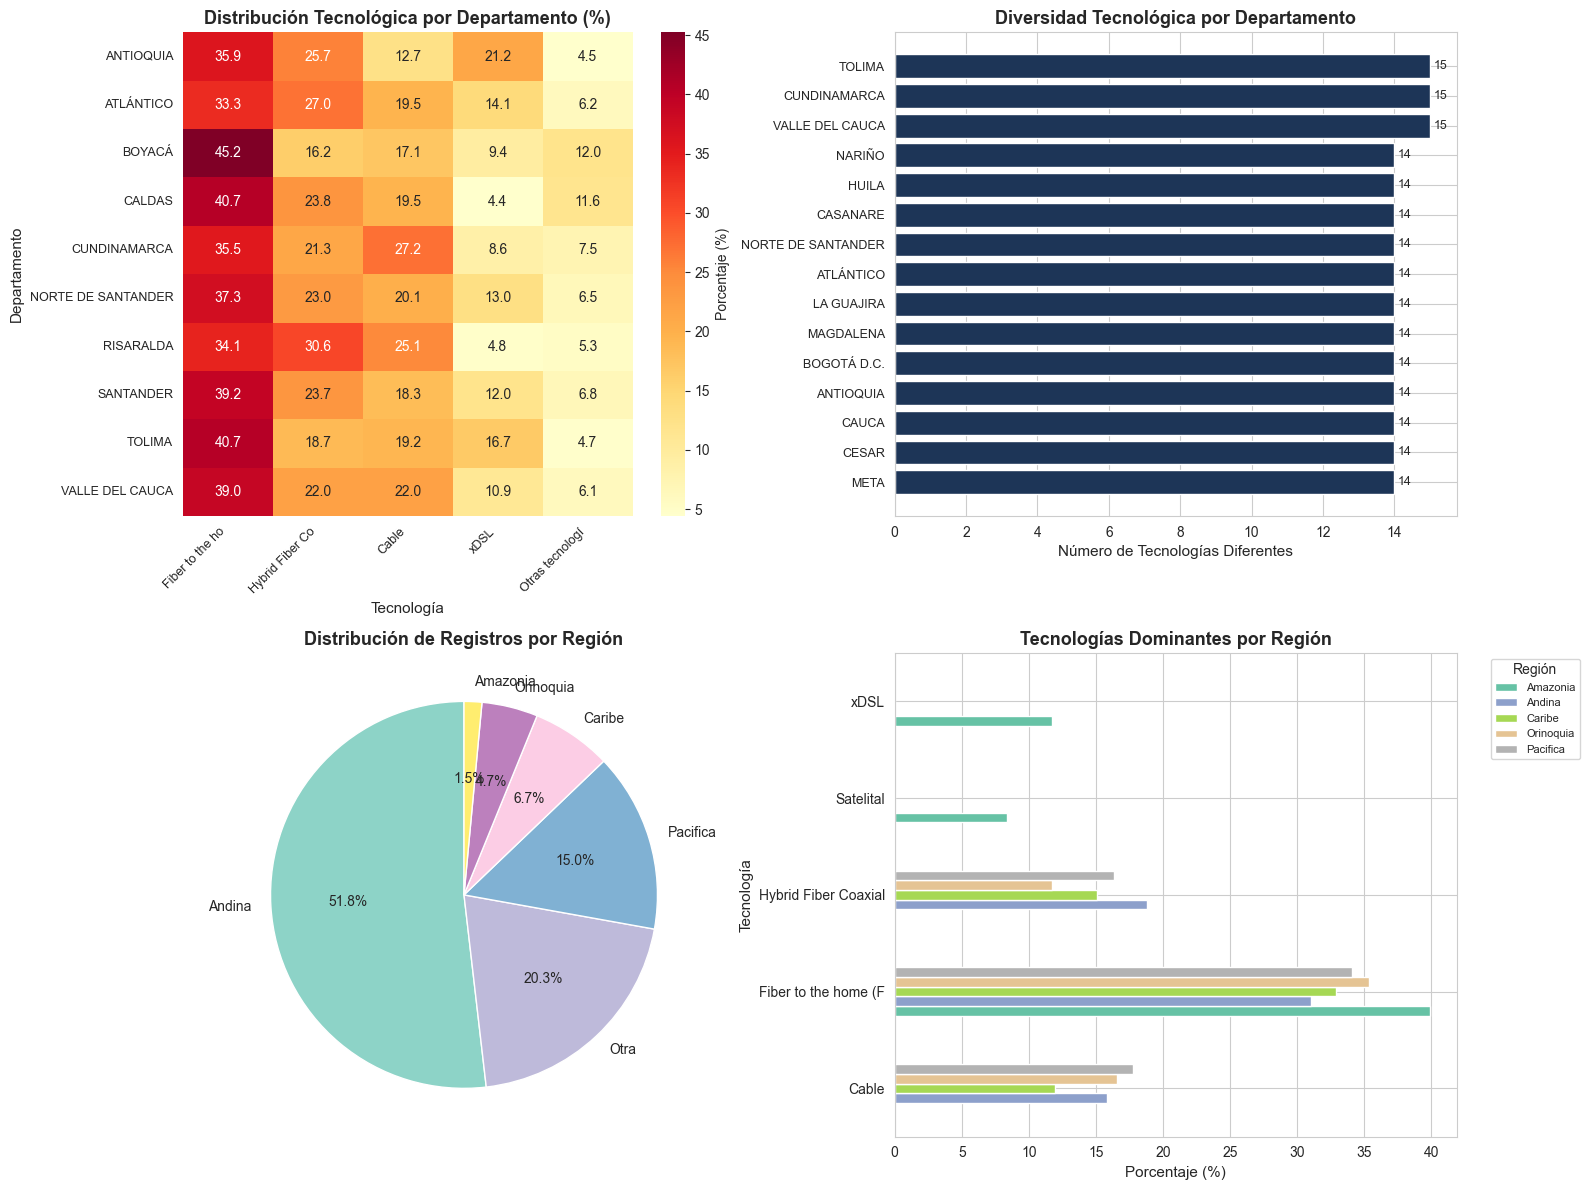

In [18]:
print("\n5.3 Comparación de tecnologías usadas por zona geográfica:")
print("-" * 80)

# Tecnologías por departamento
df_con_tech = df[df['TECNOLOGIA'] != 'NA'].copy()

print("\nTop 5 tecnologías por departamento (Top 10 departamentos):")
print("-" * 80)

top_10_deptos = df_con_tech['DEPARTAMENTO'].value_counts().head(10).index

for depto in top_10_deptos:
    print(f"\n{depto}:")
    df_depto = df_con_tech[df_con_tech['DEPARTAMENTO'] == depto]
    top_tech = df_depto['TECNOLOGIA'].value_counts().head(5)
    for i, (tech, count) in enumerate(top_tech.items(), 1):
        pct = count / len(df_depto) * 100
        print(f"  {i}. {tech:40s}: {count:>6,} ({pct:>5.2f}%)")

# Diversidad tecnológica por departamento
print("\n\nDiversidad tecnológica por departamento:")
print("-" * 80)
diversidad = df_con_tech.groupby('DEPARTAMENTO')['TECNOLOGIA'].nunique().sort_values(ascending=False)
print("\nTop 15 departamentos con mayor diversidad tecnológica:")
for i, (depto, n_tech) in enumerate(diversidad.head(15).items(), 1):
    n_registros = len(df_con_tech[df_con_tech['DEPARTAMENTO'] == depto])
    print(f"  {i:2d}. {depto:30s}: {n_tech:2d} tecnologías | {n_registros:>8,} registros")

# Identificar patrones regionales
print("\n\nPatrones tecnológicos regionales:")
print("-" * 80)

# Agrupar por región (simplificado)
regiones = {
    'Andina': ['CUNDINAMARCA', 'ANTIOQUIA', 'BOYACA', 'SANTANDER', 'NORTE DE SANTANDER', 'TOLIMA', 'HUILA', 'CALDAS', 'RISARALDA', 'QUINDIO'],
    'Caribe': ['ATLANTICO', 'BOLIVAR', 'MAGDALENA', 'CESAR', 'LA GUAJIRA', 'CORDOBA', 'SUCRE', 'SAN ANDRES'],
    'Pacifica': ['VALLE DEL CAUCA', 'CAUCA', 'NARIÑO', 'CHOCO'],
    'Orinoquia': ['META', 'CASANARE', 'ARAUCA', 'VICHADA'],
    'Amazonia': ['CAQUETA', 'PUTUMAYO', 'AMAZONAS', 'GUAINIA', 'GUAVIARE', 'VAUPES']
}

df_con_tech['REGION'] = 'Otra'
for region, deptos in regiones.items():
    df_con_tech.loc[df_con_tech['DEPARTAMENTO'].isin(deptos), 'REGION'] = region

for region in ['Andina', 'Caribe', 'Pacifica', 'Orinoquia', 'Amazonia']:
    print(f"\n{region}:")
    df_region = df_con_tech[df_con_tech['REGION'] == region]
    if len(df_region) > 0:
        top_tech_region = df_region['TECNOLOGIA'].value_counts().head(3)
        for i, (tech, count) in enumerate(top_tech_region.items(), 1):
            pct = count / len(df_region) * 100
            print(f"  {i}. {tech:40s}: {pct:>5.2f}%")

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Heatmap: Top 10 departamentos vs Top 5 tecnologías
ax1 = axes[0, 0]
top_10_deptos_list = df_con_tech['DEPARTAMENTO'].value_counts().head(10).index.tolist()
top_5_tech = df_con_tech['TECNOLOGIA'].value_counts().head(5).index.tolist()
heatmap_data = pd.crosstab(df_con_tech[df_con_tech['DEPARTAMENTO'].isin(top_10_deptos_list)]['DEPARTAMENTO'],
                            df_con_tech[df_con_tech['DEPARTAMENTO'].isin(top_10_deptos_list)]['TECNOLOGIA'])
heatmap_data = heatmap_data[top_5_tech]
heatmap_data_norm = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100
sns.heatmap(heatmap_data_norm, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax1, cbar_kws={'label': 'Porcentaje (%)'})
ax1.set_title('Distribución Tecnológica por Departamento (%)', fontsize=13, fontweight='bold')
ax1.set_xlabel('Tecnología', fontsize=11)
ax1.set_ylabel('Departamento', fontsize=11)
ax1.set_xticklabels([t[:15] for t in top_5_tech], rotation=45, ha='right', fontsize=9)
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize=9)

# Diversidad tecnológica
ax2 = axes[0, 1]
top_15_div = diversidad.head(15).sort_values()
ax2.barh(range(len(top_15_div)), top_15_div, color='#1D3557')
ax2.set_yticks(range(len(top_15_div)))
ax2.set_yticklabels(top_15_div.index, fontsize=9)
ax2.set_xlabel('Número de Tecnologías Diferentes', fontsize=11)
ax2.set_title('Diversidad Tecnológica por Departamento', fontsize=13, fontweight='bold')
for i, v in enumerate(top_15_div):
    ax2.text(v + 0.1, i, str(int(v)), va='center', fontsize=9)

# Distribución por región
ax3 = axes[1, 0]
region_counts = df_con_tech['REGION'].value_counts()
colors_region = plt.cm.Set3(np.linspace(0, 1, len(region_counts)))
ax3.pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%', 
       colors=colors_region, startangle=90)
ax3.set_title('Distribución de Registros por Región', fontsize=13, fontweight='bold')

# Top 3 tecnologías por región
ax4 = axes[1, 1]
region_tech_data = []
for region in ['Andina', 'Caribe', 'Pacifica', 'Orinoquia', 'Amazonia']:
    df_region = df_con_tech[df_con_tech['REGION'] == region]
    if len(df_region) > 0:
        top_tech = df_region['TECNOLOGIA'].value_counts().head(3)
        for tech, count in top_tech.items():
            pct = count / len(df_region) * 100
            region_tech_data.append({'Region': region, 'Tecnologia': tech[:20], 'Porcentaje': pct})

region_tech_df = pd.DataFrame(region_tech_data)
pivot_region_tech = region_tech_df.pivot_table(index='Tecnologia', columns='Region', values='Porcentaje', fill_value=0)
pivot_region_tech.plot(kind='barh', stacked=False, ax=ax4, colormap='Set2')
ax4.set_xlabel('Porcentaje (%)', fontsize=11)
ax4.set_ylabel('Tecnología', fontsize=11)
ax4.set_title('Tecnologías Dominantes por Región', fontsize=13, fontweight='bold')
ax4.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()